In [1]:
import re,string
import nltk

from pprint import pprint
import pandas as pd
import numpy as np
import os
import matplotlib
import functools
from functools import reduce

from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import matplotlib.pyplot as pyplt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
import multiprocessing
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.collections import Counter
from nltk.tokenize import TreebankWordTokenizer
import en_core_web_sm
nlp = en_core_web_sm.load()

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer, HashingVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
import sklearn.linear_model 

from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import spacy

# Plotting tools
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

RANDOM = 36 # To be reproducible

# set working file
os.chdir('/Users/rachelmartonik/MSDS_498_Capstone/data')

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.manifold.t_sne module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.manifold. Anything that cannot be imported from sklearn.manifold is now part of the private API.
  warnings.warn(message, FutureWarning)


# Data

I am pulling daily data from the Twitter application user interface (API) using the rtweet package in R. Data collection is limited to tweets posted in Virginia according to Twitter. Two daily pulls are run:

    1.	COVID pull that uses the search terms: #COVID, COVID, COVID-19, #COVID-19, coronavirus, and #coronavirus. Data collection started April 7th.
    2.	Stay-at-home pull that uses the search terms: #stayhome, #stayathome, #Quarantine, quarantine, and #SocialDistancing. Data collection started April 9th.



In [603]:
#### Read in COVID pull data ###
# Find a more efficient way to do this
data = pd.read_csv("va_pull_0407.csv") 
data_0407 = data[data['X1']=='2020-04-07']
data = pd.read_csv("va_pull_0408.csv") 
data_0408 = data[data['X1']=='2020-04-08']
data = pd.read_csv("va_pull_0409.csv") 
data_0409 = data[data['X1']=='2020-04-09']
data = pd.read_csv("va_pull_0410.csv") 
data_0410 = data[data['X1']=='2020-04-10']
data = pd.read_csv("va_pull_0411.csv") 
data_0411 = data[data['X1']=='2020-04-11']
data = pd.read_csv("va_pull_0412.csv") 
data_0412 = data[data['X1']=='2020-04-12']
data = pd.read_csv("va_pull_0413.csv") 
data_0413 = data[data['X1']=='2020-04-13']
data = pd.read_csv("va_pull_0414.csv") 
data_0414 = data[data['X1']=='2020-04-14']
data = pd.read_csv("va_pull_0415.csv") 
data_0415 = data[data['X1']=='2020-04-15']
data = pd.read_csv("va_pull_0416.csv") 
data_0416 = data[data['X1']=='2020-04-16']
data = pd.read_csv("va_pull_0417.csv") 
data_0417 = data[data['X1']=='2020-04-17']
data = pd.read_csv("va_pull_0418.csv") 
data_0418 = data[data['X1']=='2020-04-18']
data = pd.read_csv("va_pull_0419.csv") 
data_0419 = data[data['X1']=='2020-04-19']
data = pd.read_csv("va_pull_0420.csv") 
data_0420 = data[data['X1']=='2020-04-20']
data = pd.read_csv("va_pull_0421.csv") 
data_0421 = data[data['X1']=='2020-04-21']
data = pd.read_csv("va_pull_0422.csv") 
data_0422 = data[data['X1']=='2020-04-22']
data = pd.read_csv("va_pull_0423.csv") 
data_0423 = data[data['X1']=='2020-04-23']
data = pd.read_csv("va_pull_0424.csv") 
data_0424 = data[data['X1']=='2020-04-24']
data = pd.read_csv("va_pull_0425.csv") 
data_0425 = data[data['X1']=='2020-04-25']
data = pd.read_csv("va_pull_0426.csv") 
data_0426 = data[data['X1']=='2020-04-26']
data = pd.read_csv("va_pull_0427.csv") 
data_0427 = data[data['X1']=='2020-04-27']
data = pd.read_csv("va_pull_0428_redo.csv") 
data_0428 = data[data['X1']=='2020-04-28']
data = pd.read_csv("va_pull_0429.csv") 
data_0429 = data[data['X1']=='2020-04-29']
data = pd.read_csv("va_pull_0430.csv") 
data_0430 = data[data['X1']=='2020-04-30']
data = pd.read_csv("va_pull_0501.csv") 
data_0501 = data[data['X1']=='2020-05-01']
data = pd.read_csv("va_pull_0502.csv") 
data_0502 = data[data['X1']=='2020-05-02']
data = pd.read_csv("va_pull_0503.csv") 
data_0503 = data[data['X1']=='2020-05-03']
data = pd.read_csv("va_pull_0504.csv") 
data_0504 = data[data['X1']=='2020-05-04']
data = pd.read_csv("va_pull_0505.csv") 
data_0505 = data[data['X1']=='2020-05-05']
data = pd.read_csv("va_pull_0506.csv") 
data_0506 = data[data['X1']=='2020-05-06']
data = pd.read_csv("va_pull_0507.csv") 
data_0507 = data[data['X1']=='2020-05-07']

/Users/rachelmartonik/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [604]:
# Get COVID related tweet frequencies
dates = [data_0407, data_0408, data_0409, data_0410, data_0411, data_0412, data_0413, data_0414, data_0415, data_0416,
        data_0417, data_0418, data_0419, data_0420, data_0421, data_0422, data_0423, data_0424, data_0425,
        data_0426, data_0427, data_0428, data_0429, data_0430, data_0501, data_0502, data_0503, data_0504,
        data_0505, data_0506, data_0507]


In [605]:
date_freq = []

for date in dates:
    freq = len(date)
    date_freq.append(freq)

date_freq_df = pd.DataFrame(date_freq, columns = ['frequency'],) 

In [606]:
date_freq_df['date'] = ['4/7', '4/8', '4/9', '4/10', '4/11', '4/12', '4/13', '4/14', '4/15', '4/16',
                       '4/17', '4/18', '4/19', '4/20', '4/21', '4/22', '4/23', '4/24', '4/25', '4/26', '4/27', '4/28',
                       '4/29', '4/30', '5/1', '5/2', '5/3', '5/4', '5/5', '5/6', '5/7']

In [607]:
date_freq_df

,frequency,date
0,49194,4/7
1,47847,4/8
2,45651,4/9
3,41537,4/10
4,29042,4/11
5,24927,4/12
6,39581,4/13
7,42231,4/14
8,42962,4/15
9,42669,4/16


# Geolocation EDA

In [608]:
# # use dates from above to merge all files into one raw file
# merged = pd.concat(dates, axis=0, sort=False)
# print(merged.info())
# print(merged.X1.value_counts()) # Double check counts by day are correct

In [609]:
# # Check those that gave exact coordinates of Tweet
# a = pd.DataFrame(merged.geo_coords.value_counts())
# a.drop

In [610]:
# # Calculate percentage
# gave_exact_location = len(merged) - a.iloc[0]
# print('Gave exact location/geocoords: ', gave_exact_location/ len(merged))

In [611]:
# # Check those that have location data in thier profile
# gave_user_location = merged.location.count()
# print(gave_user_location)
# print('Gave user location: ', gave_user_location/ len(merged))

In [612]:
# merged.location.value_counts()

In [613]:
# # To merge VA data sets to get a sense of scale
# # use dates from above to merge all files into one raw file
# merged_va = pd.concat(va_dates, axis=0, sort=False)
# print(merged_va.info())
# print(merged_va.X1.value_counts()) # Double check counts by day are correct

# Create Crosswalk of user-reported location names to county names

First ran on 4/25 using data as of 4/23. There were 656935 records. Collapsed "location", then cleaned it. Pulled it into excel to map to county names. Loaded into Google Maps API.

Run this again when new user-provided locations are added.

In [614]:
# # collapse location data to create county level crosswalk
# names = pd.DataFrame(merged.location.value_counts())
# names.reset_index(inplace=True)
# names.columns=['name', 'count']

In [615]:
# #create list of all texts for cleaning
# location_text=[]
# for i in range(0,len(names)):
#     temp_text=names['name'].iloc[i]
#     location_text.append(temp_text)
    
# #print(location_text)

In [616]:
# location_text_test = location_text[0:15]
# print(location_text_test)

In [617]:
# # Need to lowercase all locations
# # Find a more efficient way to do this!

# def clean_location(location): 
#     tokens=location.split()
#     re_punc = re.compile('[%s]' % re.escape(string.punctuation)) # remove punctuation from each word
#     tokens = [re_punc.sub('', w) for w in tokens]
#     tokens = [word for word in tokens if word.isalpha()]
#     tokens = [word.lower() for word in tokens]  
#     return tokens

# location_text_lower=[]

# # Process documents - pros
# for i in location_text:
#     text=clean_location(i)
#     location_text_lower.append(text)

# location_text_lower_com = []

# for i in location_text_lower:
#     temp_DSI=" ".join(str(item) for item in i )
#     location_text_lower_com.append(temp_DSI)
    
# print(location_text[0])
# print(location_text_lower_com[0:100])

In [618]:
# # Collapse again for crosswalk
# location_df = pd.DataFrame(location_text_lower_com)
# location_df.columns = ['name']
# location_df = pd.DataFrame(location_df.name.value_counts())
# location_df.to_csv('loc_names.csv') # Save location names to make location crosswalk

## Load crosswalk back in to merged with cleaned locations

In [619]:
# Read in crosswalk to merge with merged df
crosswalk = pd.read_csv("un_crosswalk_working.csv") # updated on 5/3/2020
crosswalk.columns = ['num_index', 'location', 'county_name']
crosswalk['location'] = crosswalk['location'].astype('str')
crosswalk.drop(columns=['num_index'], inplace=True)
crosswalk.dtypes

# Create dictionary to map county names to cleaned locations
mydict = dict(zip(crosswalk.location, crosswalk.county_name))

In [620]:
crosswalk

,location,county_name
0,amen corner,accomack county
1,belle haven va,accomack county
2,bloxom virginia,accomack county
3,cashville,accomack county
4,cashville usa,accomack county
...,...,...
8059,solo,exclude
8060,johnson city knox,washington county
8061,winchesterva,winchester city
8062,seaford virginia,york county


## Clean daily data set separately for location

In [621]:
def clean_location(location): 
    tokens=location.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation)) # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word.lower() for word in tokens]  
    return tokens

In [622]:
# To clean locations in merged data set for crosswalk merge

#create list of all texts for cleaning
def process_location_data(data):
    data['location'] = data['location'].astype('str') 
    locs_to_clean=[]
    for i in range(0,len(data)):
        temp_text=data['location'].iloc[i]
        locs_to_clean.append(temp_text)
    
    processed_locs=[]

    for i in locs_to_clean:
        text=clean_location(i)
        processed_locs.append(text)

    final_locs = []

    for i in processed_locs:
        temp_DSI=" ".join(str(item) for item in i )
        final_locs.append(temp_DSI)
    
#     print(locs_to_clean[0:5])
#     print(final_locs[0:5])
    
    data['location_cleaned'] = np.array(final_locs) # Append cleaned location to data frame
    data['county_name']= data['location_cleaned'].map(mydict) # Add county_name using mydict county crosswalk

In [623]:
# dates = [data_0407, data_0408, data_0409, data_0410, data_0411, data_0412, data_0413, data_0414, data_0415, data_0416,
#         data_0417, data_0418, data_0419, data_0420, data_0421, data_0422, data_0423]

In [624]:
# Clean each data set
for date in dates:
    process_location_data(date)

/Users/rachelmartonik/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/rachelmartonik/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rachelmartonik/.local/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

# Merge cleaned location data sets together

In [625]:
# use dates from above to merge all files into one raw file
merged = pd.concat(dates, axis=0, sort=False)
print(merged.info())
print(merged.X1.value_counts()) # Double check counts by day are correct

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1083439 entries, 35984 to 40514
Data columns (total 94 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   user_id                  1083439 non-null  object 
 1   status_id                1083439 non-null  object 
 2   created_at               1083439 non-null  object 
 3   screen_name              1083439 non-null  object 
 4   text                     1083439 non-null  object 
 5   source                   1083439 non-null  object 
 6   display_text_width       1083439 non-null  int64  
 7   reply_to_status_id       190944 non-null   object 
 8   reply_to_user_id         211209 non-null   object 
 9   reply_to_screen_name     211209 non-null   object 
 10  is_quote                 1083439 non-null  bool   
 11  is_retweet               1083439 non-null  bool   
 12  favorite_count           1083439 non-null  int64  
 13  retweet_count            1083439 non-nul

In [626]:
merged.county_name.value_counts(dropna=False)

exclude                  953279
fairfax county           17212 
arlington county         15968 
richmond city            15376 
alexandria city          9501  
charlottesville city     6714  
virginia beach city      6270  
norfolk city             5759  
essex county             4945  
roanoke city             3804  
chesterfield county      3551  
loudoun county           3496  
hampton city             2930  
NaN                      2885  
isle of wight county     1944  
culpeper county          1803  
suffolk city             1789  
prince william county    1728  
harrisonburg city        1666  
falls church city        1504  
lynchburg city           1411  
newport news city        1330  
williamsburg city        1316  
montgomery county        1313  
fredericksburg city      1273  
henrico county           972   
charlotte county         913   
bristol city             843   
manassas city            682   
portsmouth city          670   
staunton city            591   
fluvanna

# Second Location Crosswalk

On 5/3 had 59717 NAN county_names - time to do another crosswalk clean

In [627]:
# UNKNOWN = merged[merged["county_name"].isna()]
# Unknown_locations = pd.DataFrame(UNKNOWN.location_cleaned.value_counts())
# Unknown_locations.to_csv('Unknown_locations_200503.csv') # Save location names to make location crosswalk
# Unknown_locations

In [628]:
# Remove non-Virginia county_names
merged2 = merged[merged['county_name'].notna()]
merged3 = merged2[merged2['county_name']!= 'exclude']
merged3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127275 entries, 36295 to 40502
Data columns (total 94 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   user_id                  127275 non-null  object 
 1   status_id                127275 non-null  object 
 2   created_at               127275 non-null  object 
 3   screen_name              127275 non-null  object 
 4   text                     127275 non-null  object 
 5   source                   127275 non-null  object 
 6   display_text_width       127275 non-null  int64  
 7   reply_to_status_id       20802 non-null   object 
 8   reply_to_user_id         23753 non-null   object 
 9   reply_to_screen_name     23753 non-null   object 
 10  is_quote                 127275 non-null  bool   
 11  is_retweet               127275 non-null  bool   
 12  favorite_count           127275 non-null  int64  
 13  retweet_count            127275 non-null  int64  
 14  q

In [629]:
# frequency of total tweets per day
total_freq = pd.DataFrame(merged.X1.value_counts())
total_freq.reset_index(inplace=True)

# frequency of total tweets per day
va_freq = pd.DataFrame(merged3.X1.value_counts())
va_freq.reset_index(inplace=True)

In [630]:
data_0428.X1.value_counts()

2020-04-28    36471
Name: X1, dtype: int64

In [631]:
a = pd.DataFrame(merged3.X1.value_counts())
a.reset_index(inplace=True)
a.sort_values(by='index', ascending=True)

,index,X1
0,2020-04-07,5743
1,2020-04-08,5682
2,2020-04-09,5458
5,2020-04-10,5010
23,2020-04-11,3235
25,2020-04-12,2865
10,2020-04-13,4659
6,2020-04-14,4979
3,2020-04-15,5051
4,2020-04-16,5016


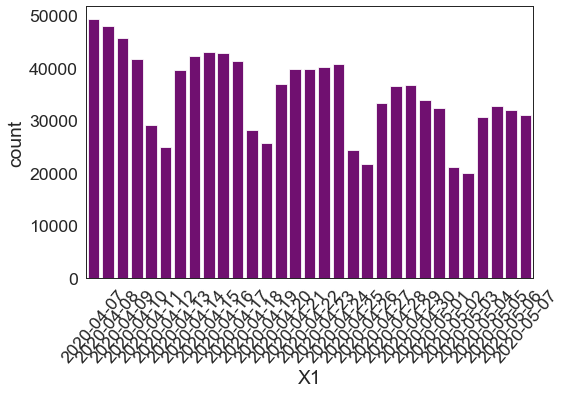

In [632]:
# Total Tweets by Day
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="X1", data=merged, color="purple")
plt.setp(ax.get_xticklabels(), rotation=50);

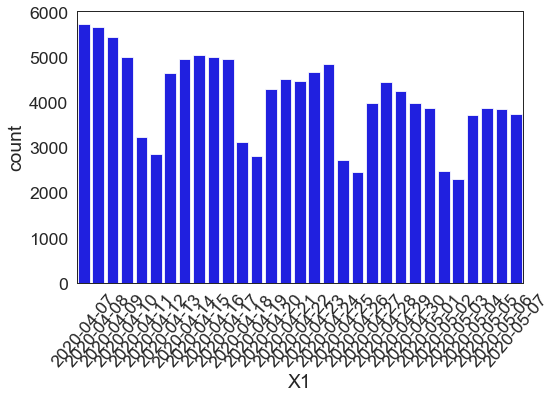

In [633]:
# VA Tweets by Day
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="X1", data=merged3, color="b")
plt.setp(ax.get_xticklabels(), rotation=50);

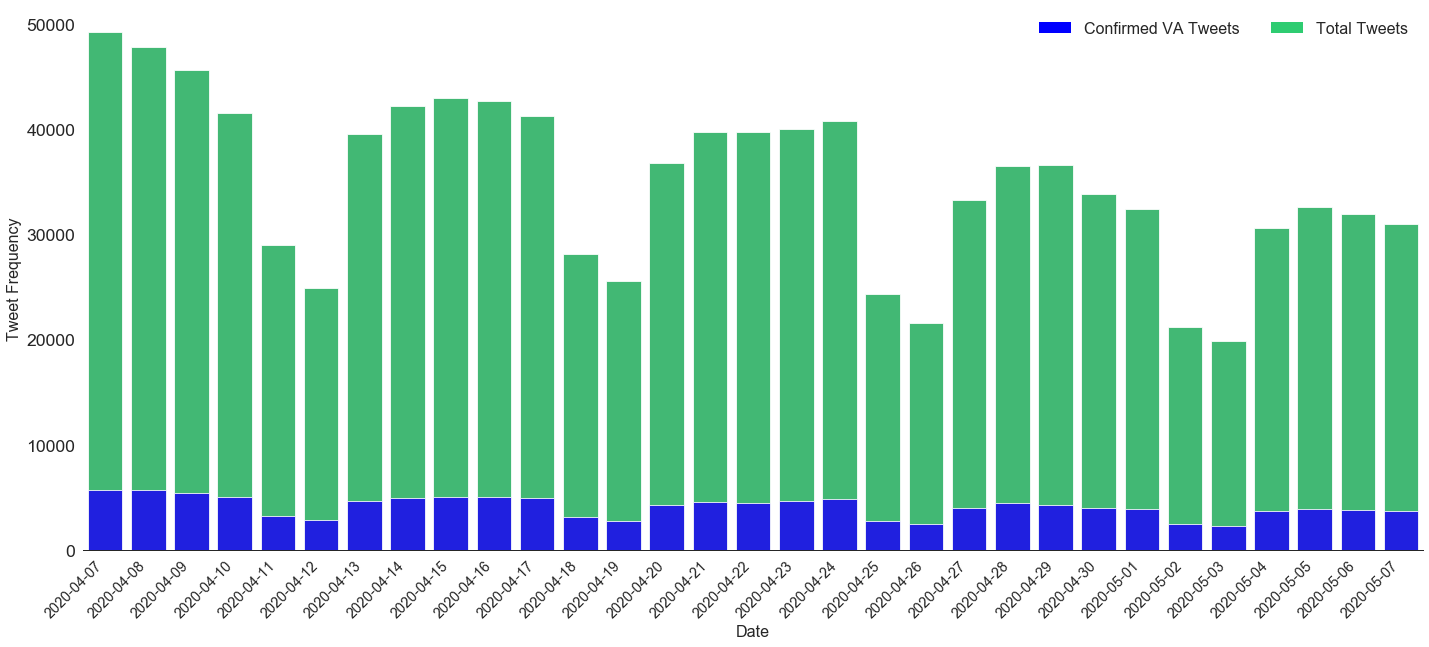

In [634]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.countplot(x="X1", data=merged, color="#2ecc71")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.countplot(x="X1", data=merged3, color="b")

topbar = plt.Rectangle((0,0),1,1,fc="#2ecc71", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='b',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Confirmed VA Tweets', 'Total Tweets'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Tweet Frequency", size=16)
bottom_plot.set_xlabel("Date", size=16)

#Set fonts to consistent 16pt size

bottom_plot.set_xticklabels(
    bottom_plot.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large');

plt.savefig("Tweet Frequency Bar Chart", tight_layout=False)
# plt.figure(figsize=(8, 5))
# plt.setp(ax.get_xticklabels(), rotation=50);



In [635]:
len(merged3)

127275

# Additional Data Processing
 - Remove non-English Tweets
 - Remove news outlets and serial Tweeters


In [636]:
# Select date to review
data = merged3
# Language distribution by daily data
print(data.lang.value_counts)

#Drop non-english tweets
data = data[data['lang'] == 'en']
data.X1.value_counts()

<bound method IndexOpsMixin.value_counts of 36295    en
36296    en
36299    en
36302    en
36307    en
         ..
40417    tr
40435    en
40472    en
40475    en
40502    en
Name: lang, Length: 127275, dtype: object>


2020-04-07    5488
2020-04-08    5428
2020-04-09    5191
2020-04-16    4788
2020-04-15    4787
2020-04-14    4785
2020-04-10    4738
2020-04-17    4723
2020-04-24    4650
2020-04-23    4495
2020-04-13    4411
2020-04-21    4333
2020-04-22    4278
2020-04-28    4221
2020-04-20    4109
2020-04-29    4040
2020-04-30    3838
2020-04-27    3827
2020-05-05    3745
2020-05-01    3698
2020-05-06    3661
2020-05-07    3573
2020-05-04    3551
2020-04-11    3015
2020-04-18    2950
2020-04-12    2652
2020-04-19    2651
2020-04-25    2585
2020-04-26    2336
2020-05-02    2326
2020-05-03    2174
Name: X1, dtype: int64

## Twitter Account Stats

There are many accounts that belong to news outlets or folks that simply tweet news articles from thier account. The objective of this analysis is to surveil the VA general population's social media reactios re:COVID, I am deleting accounts with large numbers of tweets per day.



In [637]:
data.screen_name.value_counts()

#4060 unique usernames out of 8357 tweets
#Issue with accounts like @Ahighervision - just tweets out news articles - seems like his tweet text is 
# exactly the same as the title of article - 3% of all tweets for this data set!

Ahighervision      2189
Heerak4Congress    1036
WTKR3              941 
BLaw               861 
WFXRnews           812 
                  ...  
AHHCRichmond       1   
IAmCathyLynn       1   
J_Ann_Richter      1   
DeanNemphos        1   
LisaAnnRVA         1   
Name: screen_name, Length: 23611, dtype: int64

In [638]:
1659/len(data)
# Ahighervision has almost 2% of all the tweets!

0.013705420208679273

In [639]:
# Frequency of twitter accounts - need to change this to per day when I process daily files
account_freq_df = pd.DataFrame(data.screen_name.value_counts())
account_freq_df
print(account_freq_df.describe())

# #Histogram of tweets per user
# plt.figure(figsize=(10, 7.5))
# ax = sns.distplot(account_freq_df.screen_name)

        screen_name
count  23611.000000
mean   5.126721    
std    26.735188   
min    1.000000    
25%    1.000000    
50%    1.000000    
75%    3.000000    
max    2189.000000 


In [640]:
pd.set_option('display.max_rows', 500)
account_freq_df

,screen_name
Ahighervision,2189
Heerak4Congress,1036
WTKR3,941
BLaw,861
WFXRnews,812
...,...
AHHCRichmond,1
IAmCathyLynn,1
J_Ann_Richter,1
DeanNemphos,1


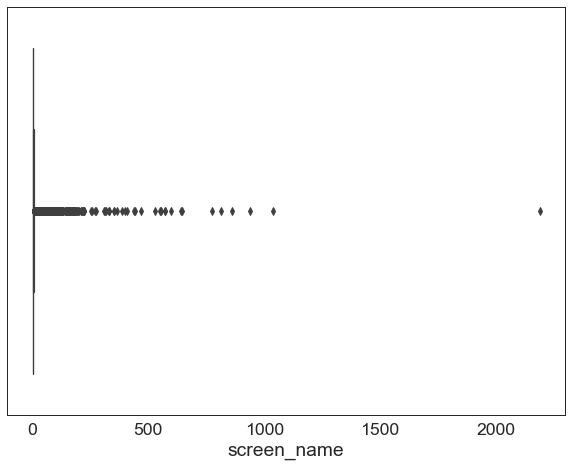

In [641]:
#Boxplot of tweets per user
plt.figure(figsize=(10, 7.5))
ax = sns.boxplot(account_freq_df.screen_name)

In [642]:
from scipy import stats
import numpy as np
account_freq_df['zscore'] = np.abs(stats.zscore(account_freq_df.screen_name))
account_freq_df

,screen_name,zscore
Ahighervision,2189,81.687082
Heerak4Congress,1036,38.559485
WTKR3,941,35.006041
BLaw,861,32.013666
WFXRnews,812,30.180837
...,...,...
AHHCRichmond,1,0.154359
IAmCathyLynn,1,0.154359
J_Ann_Richter,1,0.154359
DeanNemphos,1,0.154359


In [643]:
# Removing outliers from data frame
top_accounts = account_freq_df[account_freq_df['zscore'] >3]
print(len(top_accounts))
top_accounts.reset_index(inplace=True)
top_accounts

139


,index,screen_name,zscore
0,Ahighervision,2189,81.687082
1,Heerak4Congress,1036,38.559485
2,WTKR3,941,35.006041
3,BLaw,861,32.013666
4,WFXRnews,812,30.180837
5,NBC12,776,28.834269
6,8NEWS,644,23.896851
7,WAVY_News,643,23.859446
8,MattMurph24,600,22.251045
9,mikelotus,573,21.241118


In [644]:
# Get names of outliers/frequent tweeters to delete
frequent_user_list = top_accounts['index'].tolist()

# Remove outliers/frequent tweeters from data
data = data[~data.screen_name.isin(frequent_user_list)]
len(data)


88996

## Duplicates

In [645]:
# check for duplicates
print(data.retweet_status_id.value_counts(dropna=False)) #no retweets
data.status_id.value_counts()

NaN    88996
Name: retweet_status_id, dtype: int64


x1252584274508865536    2
x1257379480039034880    2
x1256965702508044290    2
x1249708424339894272    2
x1252336855476887553    2
                       ..
x1250393876961071105    1
x1252368190954303496    1
x1253680011585953792    1
x1253406332796973056    1
x1258124669749690368    1
Name: status_id, Length: 88985, dtype: int64

In [646]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = data[data.duplicated('text')]
duplicateRowsDF
dupes = pd.DataFrame(duplicateRowsDF.status_id)
dupe_list = dupes["status_id"].tolist()
len(dupe_list) #529 duplicate tweets to remove

364

In [647]:
# Remove duplicate tweets - these are not retweets - these are tweets by same user with same content
# 18 in first data set of ~8K
# 529 in data over 700K
data = data[~data.status_id.isin(dupe_list)]
len(data)

88621

In [648]:
merged_cleaned_data = data # Rename to avoid confusion
len(merged_cleaned_data)

88621

# Calculate overall Sentiment Score

I did this first to create process and assess mean score by county. Later in script I get daily sentiment score by county and overall.

In [649]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import pandas as pd
import csv
import re #regular expression
from textblob import TextBlob
import string
import preprocessor as p
from nltk import sent_tokenize, word_tokenize

In [650]:
#create list of all texts for cleaning
text_body=[]
for i in range(0,len(data)):
    temp_text=data['text'].iloc[i]
    text_body.append(temp_text)
    
text_body

['"How to Protect Your Mental Health During the Coronavirus"- Emily Esfahani Smith https://t.co/mTFX8yblMp',
 '#Annie #Tomorrow \n#community #singing #Covid_19 \nJoin us 8pm Thursday doorsteps\n@Clive_Harris @Annie_Osb @suffolkgiving @TimHolder11 @balletboy09 @Jochurchill4 @sarsHQ @MarkGlennMurphy @nikkijfox https://t.co/plIW1DJWxc',
 'https://t.co/OYVXzv6a7K via @YouTube\nThink we found our 8pm Thursday evening choirmaster\n#Covid_19 #community #singalong\n@RobBaskind @ClareGerada @DrSdeG @alexandra_DBmed @EM_HealthPsych @AmandaCHoweRCGP @helenamckeown @medicsupport @NikkiKF @fhussain73 @ArtfulDoctor\n@MartinRCGP',
 'We now have over 400,000 Virginians covered by Medicaid. We need healthcare coverage now more than ever. The COVID-19 tests may be free but the life saving care &amp; treatment required if you have it is not. https://t.co/XPtWr5JOKt',
 '@Blakafromerican @CNNnewsroom You are missing the point.  This is not saying African Americans are more susceptible to the disease.  It s

In [651]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
sentences = text_body
sentences

['"How to Protect Your Mental Health During the Coronavirus"- Emily Esfahani Smith https://t.co/mTFX8yblMp',
 '#Annie #Tomorrow \n#community #singing #Covid_19 \nJoin us 8pm Thursday doorsteps\n@Clive_Harris @Annie_Osb @suffolkgiving @TimHolder11 @balletboy09 @Jochurchill4 @sarsHQ @MarkGlennMurphy @nikkijfox https://t.co/plIW1DJWxc',
 'https://t.co/OYVXzv6a7K via @YouTube\nThink we found our 8pm Thursday evening choirmaster\n#Covid_19 #community #singalong\n@RobBaskind @ClareGerada @DrSdeG @alexandra_DBmed @EM_HealthPsych @AmandaCHoweRCGP @helenamckeown @medicsupport @NikkiKF @fhussain73 @ArtfulDoctor\n@MartinRCGP',
 'We now have over 400,000 Virginians covered by Medicaid. We need healthcare coverage now more than ever. The COVID-19 tests may be free but the life saving care &amp; treatment required if you have it is not. https://t.co/XPtWr5JOKt',
 '@Blakafromerican @CNNnewsroom You are missing the point.  This is not saying African Americans are more susceptible to the disease.  It s

In [652]:
sentiment_score = []
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    sentiment_score.append(vs)

In [653]:
a = pd.DataFrame(sentiment_score)
b = a.compound.mean()
b

0.07307285293553527

In [654]:
sentiment_score

[{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.3818},
 {'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'compound': 0.296},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.7543},
 {'neg': 0.046, 'neu': 0.954, 'pos': 0.0, 'compound': -0.296},
 {'neg': 0.081, 'neu': 0.839, 'pos': 0.081, 'compound': 0.0},
 {'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.156, 'neu': 0.778, 'pos': 0.066, 'compound': -0.714},
 {'neg': 0.06, 'neu': 0.874, 'pos': 0.067, 'compound': 0.0772},
 {'neg': 0.103, 'neu': 0.897, 'pos': 0.0, 'compound': -0.4137},
 {'neg': 0.116, 'neu': 0.884, 'pos': 0.0, 'compound': -0.1779},
 {'neg': 0.0, 'neu': 0.62, 'pos': 0.38, 'compound': 0.91},
 {'neg': 0.053, 'neu': 0.714, 'pos': 0.234, 'compound': 0.9034},
 {'neg': 0.191, 'neu': 0.809, 'pos': 0.0, 'compound': -0.3818},
 {'neg': 0.277, 'neu': 0.723, 'pos': 0.0, 'compound': -0.8313},
 {

In [655]:
# Check out a few examples
num = 65
print(text_body[num])
print(a.iloc[num])

@cspan The disparity in the deaths of Americans of African descent isn’t new news. What took @realDonaldTrump so long? The issue is just another play by @realDonaldTrump.
https://t.co/wfYM7CTr5E
neg         0.000
neu         0.918
pos         0.082
compound    0.340
Name: 65, dtype: float64


In [656]:
text_body_df = pd.DataFrame(text_body)
text_body_df.columns=['text']

In [657]:
df = pd.concat([a, text_body_df], axis=1)
df.head()

,neg,neu,pos,compound,text
0,0.000,0.822,0.178,0.3818,"""How to Protect Your Mental Health During the Coronavirus""- Emily Esfahani Smith https://t.co/mTFX8yblMp"
1,0.000,0.896,0.104,0.2960,#Annie #Tomorrow \n#community #singing #Covid_19 \nJoin us 8pm Thursday doorsteps\n@Clive_Harris @Annie_Osb @suffolkgiving @TimHolder11 @balletboy09 @Jochurchill4 @sarsHQ @MarkGlennMurphy @nikkijfox https://t.co/plIW1DJWxc
2,0.000,1.000,0.000,0.0000,https://t.co/OYVXzv6a7K via @YouTube\nThink we found our 8pm Thursday evening choirmaster\n#Covid_19 #community #singalong\n@RobBaskind @ClareGerada @DrSdeG @alexandra_DBmed @EM_HealthPsych @AmandaCHoweRCGP @helenamckeown @medicsupport @NikkiKF @fhussain73 @ArtfulDoctor\n@MartinRCGP
3,0.000,0.848,0.152,0.7543,"We now have over 400,000 Virginians covered by Medicaid. We need healthcare coverage now more than ever. The COVID-19 tests may be free but the life saving care &amp; treatment required if you have it is not. https://t.co/XPtWr5JOKt"
4,0.046,0.954,0.000,-0.2960,"@Blakafromerican @CNNnewsroom You are missing the point. This is not saying African Americans are more susceptible to the disease. It says that people who live where many AMs live, have the resources many AMs have, and have the same healthcare options are more susceptible to the coronavirus."


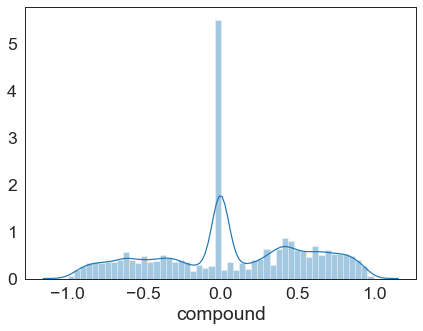

In [658]:
plt.figure(figsize=(7, 5))
ax = sns.distplot(df.compound)

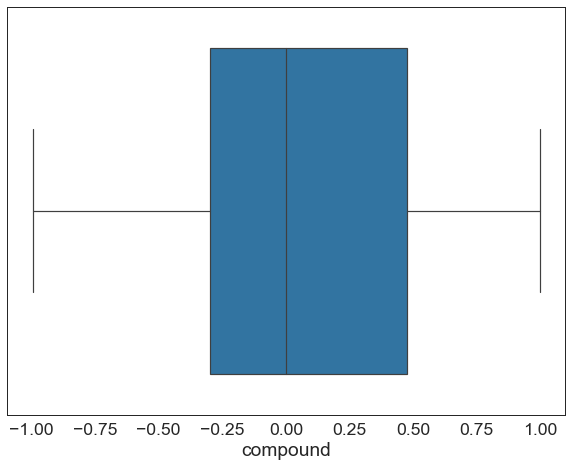

In [659]:
plt.figure(figsize=(10, 7.5))
ax = sns.boxplot(df.compound)

In [660]:
df.compound.describe()

count    88621.000000
mean     0.073073    
std      0.494536    
min     -0.994700    
25%     -0.296000    
50%      0.000000    
75%      0.476700    
max      0.997700    
Name: compound, dtype: float64

In [661]:
# Check out the most negative tweets
pd.set_option('display.max_colwidth', -1)
df.sort_values('compound')[0:50]

/Users/rachelmartonik/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,neg,neu,pos,compound,text
40189,0.601,0.383,0.015,-0.9947,"Trump referring to himself as a ""Wartime President"" is pathetic. COVID-19 is bad. Worse health crisis in 100 years. WHY do we Americans insist on casting every challenge as ""a war""? War on drugs, war on crime, war on poverty (really war on the poor), war on terror?"
82782,0.493,0.473,0.034,-0.9921,"@Amy_Siskind USA is broke and printing FAKE Money 💵 FAKE 💰, Baby Boomers are returning , their Money has been STOLEN to save WALL STREET 😱😱😱 Covid 19+ Baby Boomers = Money Saves‼️ this administration is planning kill kill kill baby boomers"
48632,0.412,0.529,0.060,-0.9909,"I want to give my mom a hug soooooo bad! 😭\n\nShe works at a nursing home, they’ve had multiple COVID deaths, she’s almost 60, my aunt lives with us and she’s like 75.\n\nI CAN’T DEAL!\n😭😭😭😭😭😭😭😭😭😭😭😭😭 https://t.co/W0UYQG5gHu"
64985,0.492,0.508,0.000,-0.9905,@deschampbelynda @JoeySalads @realDonaldTrump Did the cancer kill them? If not then they didn’t die of cancer. If those same people were shot and killed their cause of death would be listed as a gun death regardless of their cancer diagnosis. Why should Covid 19 be any different?
88300,0.472,0.528,0.000,-0.9897,"@latimes I read the article, but I don't understand his analogy. How the hell do you go from accusations of sexual assault to a virus that has potential to kill millions? Most people have empathy for the Covid-19 victims. Those accused of molesting others get little or no sympathy."
17735,0.504,0.496,0.000,-0.9896,"It is very telling that the US refers to every emergency response as a ""War on (something)"" - War on Drugs, War on Poverty, War on Terrorism, War on Christmas, War on COVID-19 ... perhaps our problem isn't guns so much as it is our mentality."
33986,0.457,0.513,0.030,-0.9893,"@UntilITsAllGone @LeaHaller55 Isn't that interesting, but OBSCENE. He warns Israel n #November. How many times has he said he didn't know ANYTHING @ the coronavirus til March.WHAT A LIAR!! @realDonaldTrump #ALWAYSALIAR #LIAR #LIAR #Liar #Liar What he needs is a straight jacket &amp; 2b n a locked padded room."
60231,0.463,0.537,0.000,-0.9869,"@sabrina68 I go by Trump's behavior. In my view T is by far the most vicious, vile, dishonest, and unstable man in politics that I have ever seen. Kids in cages. Vicious xenophobia. Hate rhetoric. Instigation of Nazis culminating in murder and death. \n\nNow covid-19.\n\nKiller. \n\n1/"
88082,0.374,0.612,0.014,-0.9865,@tod_young USA is broke and they want the elderly people dead 🤯 Covid 19+elderly =$sved🤬🤬🤬 ACA gone elderly people dead 👿 they are evil 👿👿👿 Greedy greedy old white Republicans 🤮🤮🤮
19511,0.457,0.464,0.079,-0.9863,"TO STOP TRYING TO SCREW THE AMERICAN PEOPLE OVER &amp; DO THE REAL JOB SHE WAS ELECTED TO DO!! GOD HELP HER!! DEAD BABIES FROM ABORTIONS, DEAD AMERICANS FIGHTING FOR OUR COUNTRY AND MORE DEAD AMERICANS DEAD FROM A BIOLOGICAL WARFARE STRAIN OF COVID 19 IN CHINA! OMG!"


In [662]:
# Check out the most positive tweets
pd.set_option('display.max_colwidth', -1)
df.sort_values('compound', ascending = False)[0:50]

/Users/rachelmartonik/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,neg,neu,pos,compound,text
55008,0.000,0.275,0.725,0.9977,"new series starts on Sunday ""Love During the Coronavirus""\n\nspoiler alert: keep loving and loving and loving and loving and loving and loving and loving and loving and loving and loving and loving and loving and loving and loving and loving and loving and loving and loving and lov"
26712,0.148,0.430,0.422,0.9943,@KellyannePolls covid 19 not covid 1 🤣🤣🤣🤣🤣🤣😂😂😂😂😂😂😂😂😂😂😂😂
25694,0.028,0.493,0.480,0.9887,"A dear friend of mine lost her father to COVID-19 on Sunday - a loving, gentle, joyful man whose life touched so many. In his honor, please fill this thread with kindness - a moment of hope you felt, a good deed you’ll do, words of encouragement. Let’s create a thread of love. ❤️"
40523,0.000,0.570,0.430,0.9855,"@GlblCtzn @ladygaga Thank you all for giving us this beautiful night of uplifting music, moving tributes and celebrating the front line workers.. A truly incredible night to remember. Wow! Congrats to all for raising so much money for COVID-19 relief. Stay safe and strong! 🙌🎶🎵❤ #TogetherAtHome"
80702,0.000,0.592,0.408,0.9854,So a papaya fruit tested positive for coronavirus last week in Africa.🤣🤣🤣🤣🤣🤣🤣🤣🤣
51797,0.000,0.576,0.424,0.9847,Do you know people or have friends with small businesses but don’t have extra money to help support them through COVID? That’s okay! You can still help! Check out this graphic for ways you can help promote your favorite small businesses without spending a dime! 😁 https://t.co/ckmqOrG1Z9
53459,0.018,0.737,0.245,0.9842,🤔🇺🇸🌎👀⏰⌛️⏳🙏🏿🌊🌈💕🗣https://t.co/BkdlF9XiCe Now &amp; ANYTIME &amp; ANY AMOUNT $1 or $5 CAN HELP SAVE LIVES &amp; HELP FIND A(CURE)TO GET US BACK OUTSIDE AGAIN👌🏽💕🤣🤣🤣TEXT BET GIVES TO 51555 $1 or $5 -$50+ MAY GOD BLESS YOU AND HAVE MERCY ON US ALL &amp; CONDOLES TO ALL 🏃🏾‍♀️🏃🏿#STAYSAFE🙏🏿💕PH
30000,0.000,0.583,0.417,0.9838,"@realDonaldTrump Dear Mr President, You are of course right that the WHO should have acted sooner to contain the Covid 19 virus but please don't stop funding its vital work. We are all so grateful for the USA's great generosity and compassion and need it now more than ever."
16853,0.027,0.618,0.354,0.9837,"@angelneptustar @BorisJohnson OK all things considered. It helps that we aren't very sociable in ""real"" life tbh! I quite like keeping a distance from people as I have a thing about germs at the best of times regardless of covid. Lots of arts and crafts and films and roblox in our house 😊😊😊😍"
18005,0.000,0.582,0.418,0.9832,"Your incredible generosity in support of our Mountbatten Nurses and Carers means you have now raised over £50,000 in just 6 days! 😍 We are so proud of our truly amazing community. Please share and encourage others to donate: https://t.co/sXH4bVHOQJ\nThank you so much 💛🌻💛 https://t.co/eTQnxEgBIB"


In [663]:
locations = pd.DataFrame(data['county_name'])
locations.reset_index(inplace=True)
locations

area = pd.concat([df, locations], axis=1)
area

,neg,neu,pos,compound,text,index,county_name
0,0.000,0.822,0.178,0.3818,"""How to Protect Your Mental Health During the Coronavirus""- Emily Esfahani Smith https://t.co/mTFX8yblMp",36534,fairfax county
1,0.000,0.896,0.104,0.2960,#Annie #Tomorrow \n#community #singing #Covid_19 \nJoin us 8pm Thursday doorsteps\n@Clive_Harris @Annie_Osb @suffolkgiving @TimHolder11 @balletboy09 @Jochurchill4 @sarsHQ @MarkGlennMurphy @nikkijfox https://t.co/plIW1DJWxc,36971,suffolk city
2,0.000,1.000,0.000,0.0000,https://t.co/OYVXzv6a7K via @YouTube\nThink we found our 8pm Thursday evening choirmaster\n#Covid_19 #community #singalong\n@RobBaskind @ClareGerada @DrSdeG @alexandra_DBmed @EM_HealthPsych @AmandaCHoweRCGP @helenamckeown @medicsupport @NikkiKF @fhussain73 @ArtfulDoctor\n@MartinRCGP,36973,suffolk city
3,0.000,0.848,0.152,0.7543,"We now have over 400,000 Virginians covered by Medicaid. We need healthcare coverage now more than ever. The COVID-19 tests may be free but the life saving care &amp; treatment required if you have it is not. https://t.co/XPtWr5JOKt",37086,prince william county
4,0.046,0.954,0.000,-0.2960,"@Blakafromerican @CNNnewsroom You are missing the point. This is not saying African Americans are more susceptible to the disease. It says that people who live where many AMs live, have the resources many AMs have, and have the same healthcare options are more susceptible to the coronavirus.",37733,frederick county
...,...,...,...,...,...,...,...
88616,0.093,0.820,0.087,0.1832,One more sad and disappointing event in this whole COVID-19 pandemic saga. But predictable. The only thing I’ll add are my concerns that this is only a preamble to what we could witness with the development of an effective #COVID vaccine. https://t.co/RoSBRk3Jy6,40075,charlottesville city
88617,0.000,1.000,0.000,0.0000,COVID -19 Haikus Day 52 is called “My Child’s Research Skills are Amazing” https://t.co/VzC7Q8MdE3,40154,virginia beach city
88618,0.000,1.000,0.000,0.0000,What ya think about this??\n https://t.co/rz3exrQCCx,40293,fairfax county
88619,0.142,0.710,0.148,0.0258,Are you interested in making a noticeable impact in the global fight against COVID-19? https://t.co/ZGlFzL9nUE,40472,prince edward county


In [664]:
area = pd.concat([df, locations], axis=1)
area

,neg,neu,pos,compound,text,index,county_name
0,0.000,0.822,0.178,0.3818,"""How to Protect Your Mental Health During the Coronavirus""- Emily Esfahani Smith https://t.co/mTFX8yblMp",36534,fairfax county
1,0.000,0.896,0.104,0.2960,#Annie #Tomorrow \n#community #singing #Covid_19 \nJoin us 8pm Thursday doorsteps\n@Clive_Harris @Annie_Osb @suffolkgiving @TimHolder11 @balletboy09 @Jochurchill4 @sarsHQ @MarkGlennMurphy @nikkijfox https://t.co/plIW1DJWxc,36971,suffolk city
2,0.000,1.000,0.000,0.0000,https://t.co/OYVXzv6a7K via @YouTube\nThink we found our 8pm Thursday evening choirmaster\n#Covid_19 #community #singalong\n@RobBaskind @ClareGerada @DrSdeG @alexandra_DBmed @EM_HealthPsych @AmandaCHoweRCGP @helenamckeown @medicsupport @NikkiKF @fhussain73 @ArtfulDoctor\n@MartinRCGP,36973,suffolk city
3,0.000,0.848,0.152,0.7543,"We now have over 400,000 Virginians covered by Medicaid. We need healthcare coverage now more than ever. The COVID-19 tests may be free but the life saving care &amp; treatment required if you have it is not. https://t.co/XPtWr5JOKt",37086,prince william county
4,0.046,0.954,0.000,-0.2960,"@Blakafromerican @CNNnewsroom You are missing the point. This is not saying African Americans are more susceptible to the disease. It says that people who live where many AMs live, have the resources many AMs have, and have the same healthcare options are more susceptible to the coronavirus.",37733,frederick county
...,...,...,...,...,...,...,...
88616,0.093,0.820,0.087,0.1832,One more sad and disappointing event in this whole COVID-19 pandemic saga. But predictable. The only thing I’ll add are my concerns that this is only a preamble to what we could witness with the development of an effective #COVID vaccine. https://t.co/RoSBRk3Jy6,40075,charlottesville city
88617,0.000,1.000,0.000,0.0000,COVID -19 Haikus Day 52 is called “My Child’s Research Skills are Amazing” https://t.co/VzC7Q8MdE3,40154,virginia beach city
88618,0.000,1.000,0.000,0.0000,What ya think about this??\n https://t.co/rz3exrQCCx,40293,fairfax county
88619,0.142,0.710,0.148,0.0258,Are you interested in making a noticeable impact in the global fight against COVID-19? https://t.co/ZGlFzL9nUE,40472,prince edward county


In [665]:
count = area.groupby('county_name').count()
count = pd.DataFrame(count['text'])
count.reset_index(inplace = True)
count.head()

,county_name,text
0,accomack county,38
1,albemarle county,97
2,alexandria city,8126
3,alleghany county,4
4,amelia county,4


In [666]:
count.reset_index(drop=True, inplace = True)
count.sort_values('text')

,county_name,text
9,bath county,1
94,pitt county,1
11,bland county,1
97,portsmouth,1
57,henderson county,1
28,covington,1
64,king and queen county,2
23,charlottsville city,2
126,wake county,2
3,alleghany county,4


In [667]:
# Map count of counties to dataframe
location_count_dict = dict(zip(count.county_name, count.text))
location_count_dict
area['count'] = area['county_name'].map(location_count_dict)

In [668]:
location_count_dict

{'accomack county': 38,
 'albemarle county': 97,
 'alexandria city': 8126,
 'alleghany county': 4,
 'amelia county': 4,
 'amherst county': 91,
 'appomattox county': 49,
 'arlington county': 9056,
 'augusta county': 161,
 'bath county': 1,
 'bedford county': 288,
 'bland county': 1,
 'botetourt county': 23,
 'bristol city': 296,
 'brunswick county': 30,
 'buchanan county': 11,
 'buckingham county': 60,
 'campbell county': 32,
 'caroline county': 21,
 'carroll county': 20,
 'charles city county': 10,
 'charlotte county': 694,
 'charlottesville city': 4804,
 'charlottsville city': 2,
 'chesapeake city': 8,
 'chesterfield county': 814,
 'clarke county': 25,
 'colonial heights city': 70,
 'covington': 1,
 'craig county': 4,
 'culpeper county': 1501,
 'cumberland county': 52,
 'danville city': 180,
 'dickenson county': 12,
 'dinwiddie county': 44,
 'emporia city': 5,
 'essex county': 3618,
 'fairfax city': 12,
 'fairfax county': 13475,
 'falls church city': 1219,
 'fauquier county': 330,
 'f

In [669]:
location = area.groupby('county_name')
print(location)

In [670]:
location = area.groupby('county_name').mean()
location.sort_values('compound', inplace=True)
location.reset_index(inplace=True)
location

,county_name,neg,neu,pos,compound,index,count
0,bland county,0.181000,0.819000,0.000000,-0.624900,34983.000000,1.0
1,bath county,0.163000,0.837000,0.000000,-0.542300,53146.000000,1.0
2,covington,0.204000,0.643000,0.153000,-0.264800,10364.000000,1.0
3,buchanan county,0.141909,0.780000,0.078182,-0.189518,30771.545455,11.0
4,giles county,0.114444,0.821111,0.064444,-0.184378,48062.000000,9.0
5,mecklenburg county,0.102862,0.838966,0.058155,-0.183510,32401.672414,58.0
6,lunenburg county,0.067750,0.885500,0.047000,-0.182975,33648.000000,4.0
7,pittsylvania county,0.123479,0.808959,0.067479,-0.178038,31735.684932,73.0
8,cumberland county,0.096904,0.851038,0.052077,-0.166967,23914.923077,52.0
9,floyd county,0.121591,0.810682,0.067682,-0.147039,38000.159091,44.0


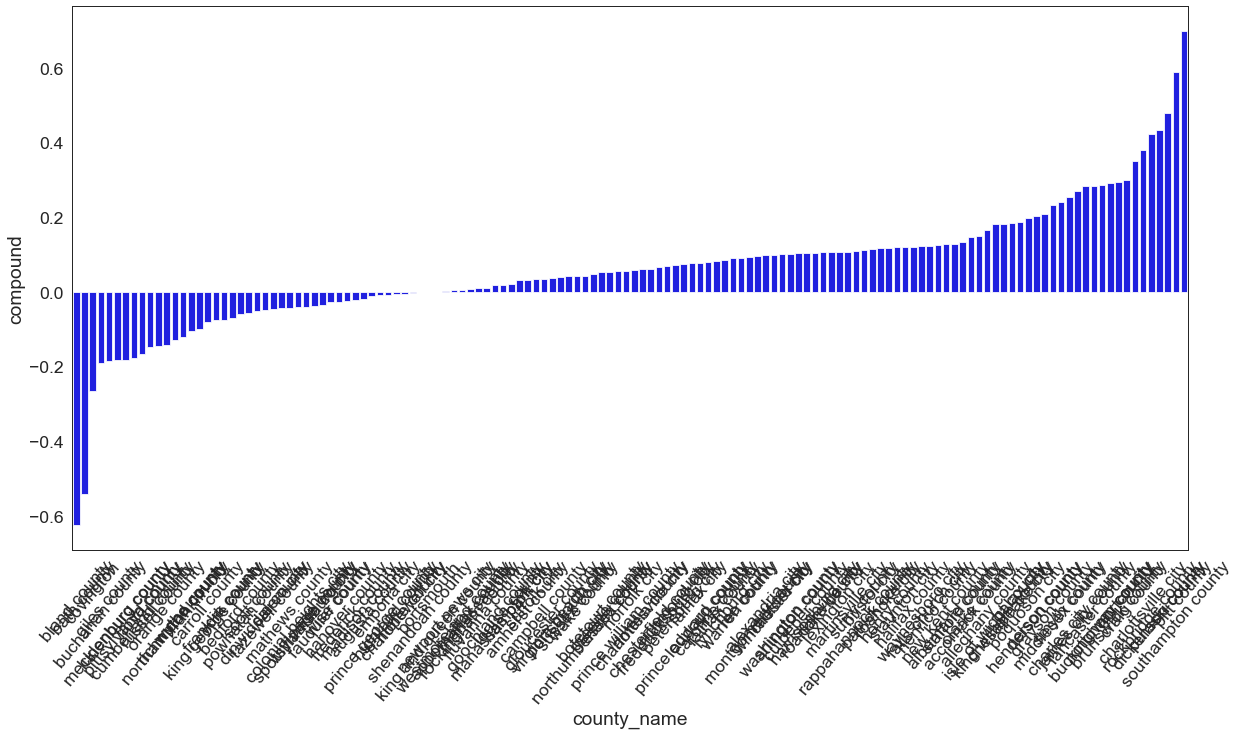

In [671]:
# Overall sentiment score by county - including all counties even with small sample sizes
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="county_name", y="compound", data=location, color="b")
plt.setp(ax.get_xticklabels(), rotation=50);

In [672]:
location.sort_values('count', ascending=False)
location_GT20 = location[location['count']>20]
location_GT20.sort_values('compound', ascending=True)

,county_name,neg,neu,pos,compound,index,count
5,mecklenburg county,0.102862,0.838966,0.058155,-0.183510,32401.672414,58.0
7,pittsylvania county,0.123479,0.808959,0.067479,-0.178038,31735.684932,73.0
8,cumberland county,0.096904,0.851038,0.052077,-0.166967,23914.923077,52.0
9,floyd county,0.121591,0.810682,0.067682,-0.147039,38000.159091,44.0
10,russell county,0.100667,0.829286,0.070048,-0.144786,41382.857143,21.0
11,orange county,0.135773,0.806413,0.057813,-0.143600,33749.600000,75.0
13,richmond county,0.087179,0.831107,0.081750,-0.121364,34925.428571,28.0
14,wythe county,0.109237,0.820831,0.069966,-0.103637,32703.644068,59.0
17,king george county,0.096197,0.823912,0.079921,-0.076490,32780.350877,228.0
18,franklin county,0.100355,0.830737,0.068934,-0.074566,31783.052632,76.0


In [673]:
location_GT20.reset_index(inplace = True) 
location_GT20

,level_0,county_name,neg,neu,pos,compound,index,count
0,5,mecklenburg county,0.102862,0.838966,0.058155,-0.183510,32401.672414,58.0
1,7,pittsylvania county,0.123479,0.808959,0.067479,-0.178038,31735.684932,73.0
2,8,cumberland county,0.096904,0.851038,0.052077,-0.166967,23914.923077,52.0
3,9,floyd county,0.121591,0.810682,0.067682,-0.147039,38000.159091,44.0
4,10,russell county,0.100667,0.829286,0.070048,-0.144786,41382.857143,21.0
5,11,orange county,0.135773,0.806413,0.057813,-0.143600,33749.600000,75.0
6,13,richmond county,0.087179,0.831107,0.081750,-0.121364,34925.428571,28.0
7,14,wythe county,0.109237,0.820831,0.069966,-0.103637,32703.644068,59.0
8,17,king george county,0.096197,0.823912,0.079921,-0.076490,32780.350877,228.0
9,18,franklin county,0.100355,0.830737,0.068934,-0.074566,31783.052632,76.0


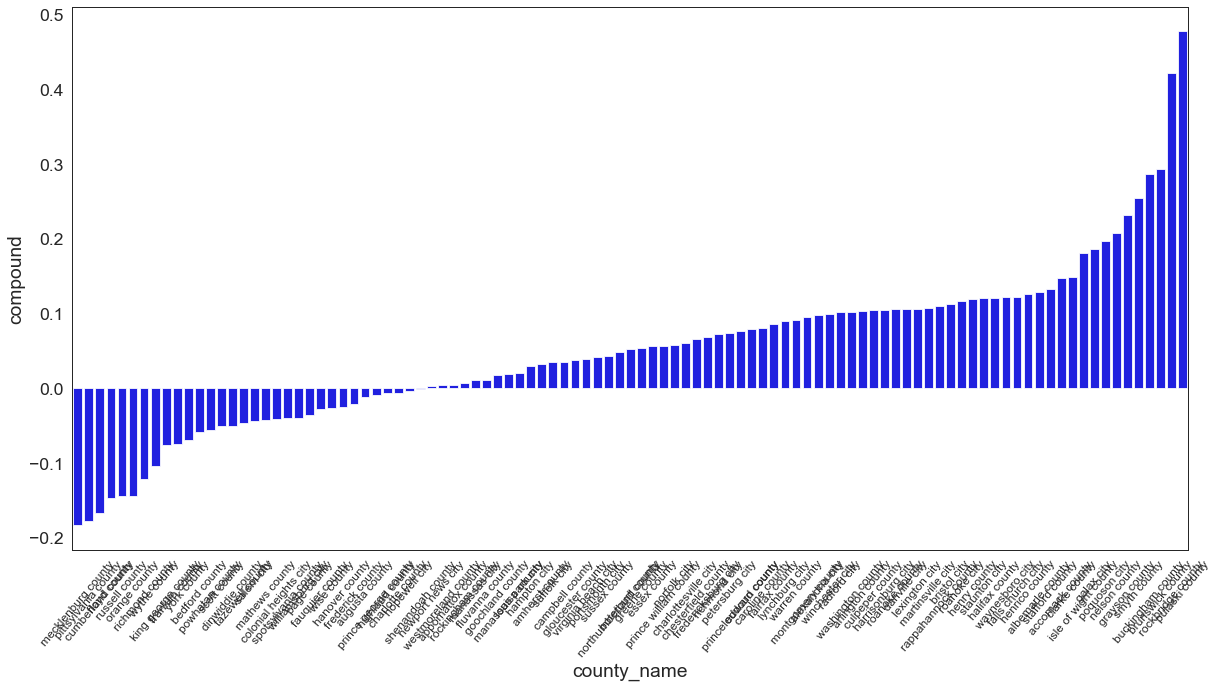

In [674]:
# Overall sentiment score by county - Removed counites with less than 20 tweets
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="county_name", y="compound", data=location_GT20, color="b")
plt.setp(ax.get_xticklabels(), size=12, rotation=50);
plt.savefig("Sentiment by County - more than 20", tight_layout=False)

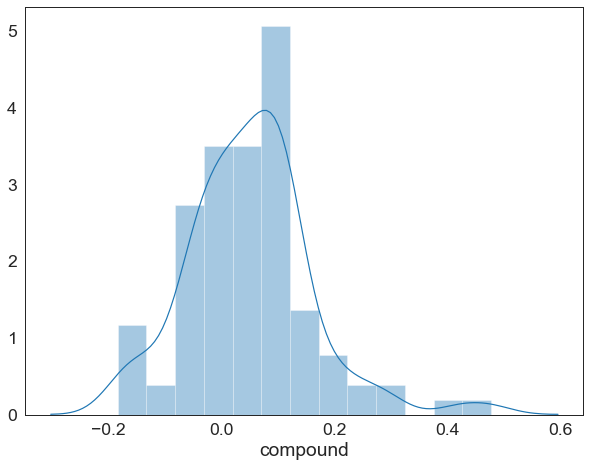

In [675]:
plt.figure(figsize=(10, 7.5))
ax = sns.distplot(location_GT20.compound)

In [676]:
location_GT20.compound.describe()

count    101.000000
mean     0.050619  
std      0.111208  
min     -0.183510  
25%     -0.020901  
50%      0.052122  
75%      0.106066  
max      0.477639  
Name: compound, dtype: float64

In [677]:
location_GT20 = location_GT20.sort_values('compound', ascending=False)
location_GT20

,level_0,county_name,neg,neu,pos,compound,index,count
100,133,pulaski county,0.051278,0.777500,0.171222,0.477639,38753.111111,36.0
99,131,rockbridge county,0.046762,0.804310,0.149024,0.421298,33960.214286,42.0
98,127,brunswick county,0.028400,0.859233,0.112367,0.293577,35775.633333,30.0
97,125,buckingham county,0.031300,0.857400,0.111367,0.286812,40795.033333,60.0
96,121,smyth county,0.047238,0.805952,0.146810,0.254467,33960.857143,21.0
95,119,grayson county,0.119519,0.717667,0.162889,0.231978,44550.074074,27.0
94,118,nelson county,0.053116,0.846695,0.100168,0.207827,32277.673684,95.0
93,116,poquoson city,0.065703,0.816919,0.117378,0.196495,40876.540541,37.0
92,115,galax city,0.054810,0.842810,0.102381,0.186886,33493.238095,21.0
91,112,isle of wight county,0.063214,0.821727,0.115059,0.180604,34701.392975,911.0


# Pull in COVID tracking data
Recorded cases per capita

In [678]:
per_capita = pd.read_csv("cases_per_1000.csv") 
per_capita = per_capita[['county_lower','2020-05-07_per']]#select just county_name and today's numbers
per_capita.columns=('county_name', '2020-05-07_per')
per_capita

,county_name,2020-05-07_per
0,accomack county,14.140859
1,albemarle county,1.053077
2,alexandria city,6.772947
3,alleghany county,0.392516
4,amelia county,1.322546
5,amherst county,0.470485
6,appomattox county,1.348141
7,arlington county,5.383882
8,augusta county,0.736269
9,bedford county,0.474919


In [679]:
per_capita_today = pd.merge(location_GT20, per_capita, on='county_name')
per_capita_today = per_capita_today[['county_name', 'compound', '2020-05-07_per']]
per_capita_today['State']="Virginia"
per_capita_today.rename(columns={'compound':'sentiment'}, inplace=True)
# Save Cases Per Capita Data set
per_capita_today.to_csv("/Users/rachelmartonik/MSDS_498_Capstone/data/per_capita_today.csv")

In [680]:
per_capita_today

,county_name,sentiment,2020-05-07_per,State
0,pulaski county,0.477639,0.262897,Virginia
1,rockbridge county,0.421298,0.355413,Virginia
2,brunswick county,0.293577,0.960096,Virginia
3,buckingham county,0.286812,13.232181,Virginia
4,smyth county,0.254467,0.418558,Virginia
5,grayson county,0.231978,0.316236,Virginia
6,nelson county,0.207827,0.607615,Virginia
7,poquoson city,0.196495,0.581444,Virginia
8,galax city,0.186886,4.820729,Virginia
9,isle of wight county,0.180604,2.831849,Virginia


In [681]:
# per_capita_today['cases_per_1000'] = per_capita_today['2020-05-26_per']*100
# per_capita_today

## Confirmed Cases (per 1000) as of Today & Mean Sentiment Score

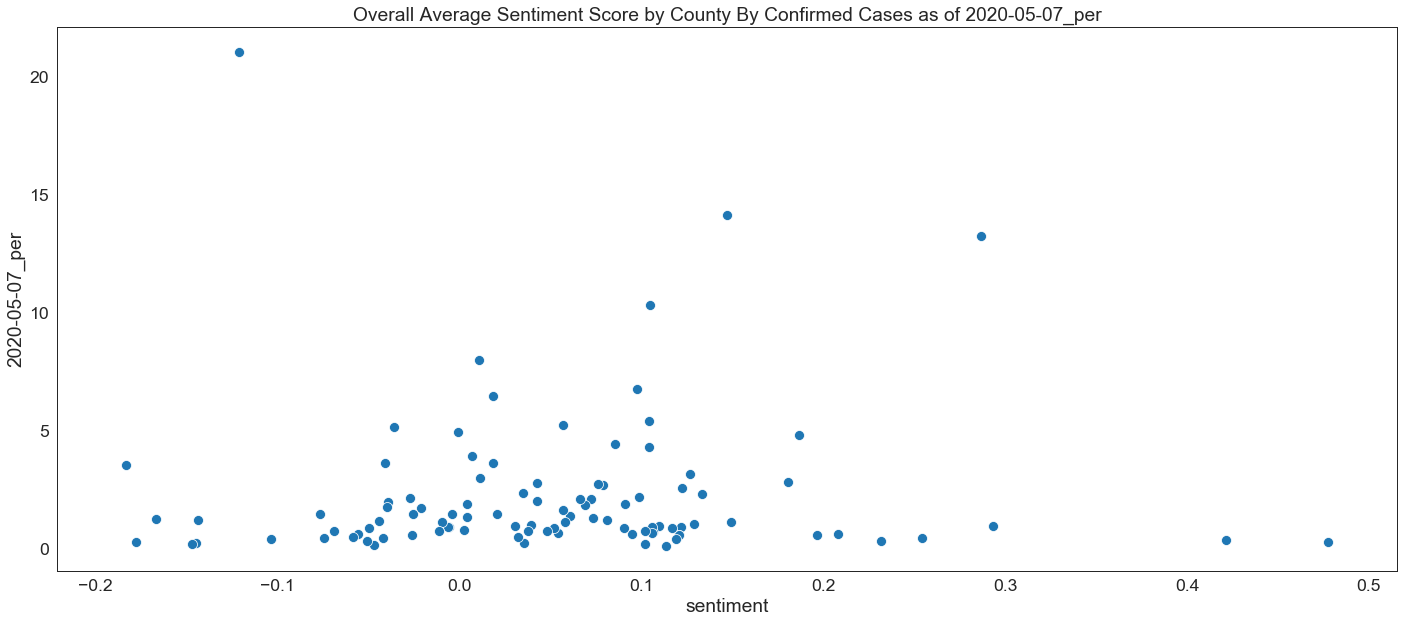

In [682]:
day = "2020-05-07_per"
sns.set_context("paper", font_scale=2)  
ax = sns.scatterplot(x="sentiment", y=day, s=100,
                     data=per_capita_today).set_title(f'Overall Average Sentiment Score by County By Confirmed Cases as of {day}')

# Average sentiment score by confirmed COVID-19 cases as of today
# Does not seem to be relationship

In [683]:
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
covariance = np.cov(per_capita_today[day], per_capita_today['sentiment'])
covariance

array([[9.68645412e+00, 6.12831292e-03],
       [6.12831292e-03, 1.24591216e-02]])

In [684]:
from scipy.stats import pearsonr

# calculate Pearson's correlation
corr, _ = pearsonr(per_capita_today[day], per_capita_today['sentiment'])
print('Pearsons correlation: %.3f' % corr)
# Low correlation between overall sentiment and daily covid cases

Pearsons correlation: 0.018


## Deaths as of Today & Mean Sentiment Score

In [685]:
per_capita_deaths = pd.read_csv("deaths_per_1000.csv") 
per_capita_deaths = per_capita_deaths[['county_lower', day]]#select just county_name and today's numbers
per_capita_deaths.columns=('county_name', day)
per_capita_deaths = per_capita_deaths[per_capita_deaths[day] >0]
per_capita_deaths

,county_name,2020-05-07_per
0,accomack county,0.213793
1,albemarle county,0.037610
2,alexandria city,0.185298
4,amelia county,0.077797
7,arlington county,0.224328
8,augusta county,0.013387
9,bedford county,0.012836
10,botetourt county,0.090302
17,caroline county,0.033130
19,charles city county,0.142959


In [686]:
per_capita_deaths_today = pd.merge(location_GT20, per_capita_deaths, on='county_name')
per_capita_deaths_today = per_capita_deaths_today[['county_name', 'compound', '2020-05-07_per']]
per_capita_deaths_today['State']="Virginia"
per_capita_deaths_today.rename(columns={'compound':'sentiment'}, inplace=True)
# Save Cases Per Capita Data set
per_capita_deaths_today.to_csv("/Users/rachelmartonik/MSDS_498_Capstone/data/per_capita_deaths_today.csv")

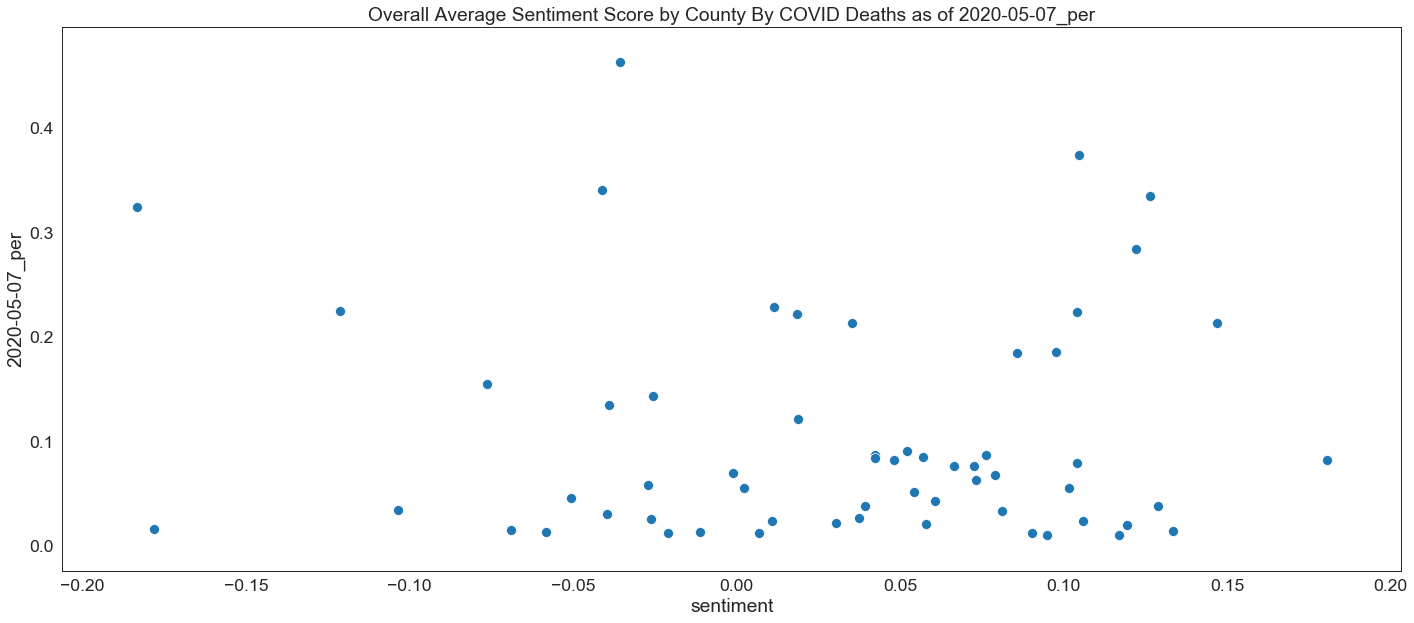

In [687]:
day = "2020-05-07_per"
sns.set_context("paper", font_scale=2)  
ax = sns.scatterplot(x="sentiment", y=day, s=100,
                     data=per_capita_deaths_today).set_title(f'Overall Average Sentiment Score by County By COVID Deaths as of {day}')

In [688]:
from scipy.stats import pearsonr

# calculate Pearson's correlation
corr, _ = pearsonr(per_capita_deaths_today[day], per_capita_deaths_today['sentiment'])
print('Pearsons correlation: %.3f' % corr)
# Low correlation between overall sentiment and daily covid cases

Pearsons correlation: -0.059


# Daily Sentiment Data

In [689]:
# Pull individual daily data sets from cleaned merged data
data_0407_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-07']
data_0408_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-08']
data_0409_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-09']
data_0410_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-10']
data_0411_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-11']
data_0412_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-12']
data_0413_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-13']
data_0414_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-14']
data_0415_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-15']
data_0416_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-16']
data_0417_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-17']
data_0418_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-18']
data_0419_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-19']
data_0420_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-20']
data_0421_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-21']
data_0422_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-22']
data_0423_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-23']
data_0424_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-24']
data_0425_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-25']
data_0426_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-26']
data_0427_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-27']
data_0428_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-28']
data_0429_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-29']
data_0430_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-30']
data_0501_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-01']
data_0502_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-02']
data_0503_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-03']
data_0504_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-04']
data_0505_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-05']
data_0506_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-06']
data_0507_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-07']



In [690]:
# LIST OF DAILY DATA SETS TO PROCESS
dates_cleaned = [data_0407_clean, data_0408_clean, data_0409_clean, data_0410_clean, data_0411_clean, data_0412_clean,
                data_0413_clean, data_0414_clean, data_0415_clean, data_0416_clean, data_0417_clean, data_0418_clean, 
                 data_0419_clean, data_0420_clean, data_0421_clean, data_0422_clean, data_0423_clean, data_0424_clean, 
                 data_0425_clean, data_0426_clean, data_0427_clean, data_0428_clean, data_0429_clean, data_0430_clean,
                data_0501_clean, data_0502_clean, data_0503_clean, data_0504_clean, data_0505_clean, data_0506_clean, 
                 data_0507_clean]

In [105]:
# for i in dates_cleaned:
#     print(len(i))

In [691]:
#create list of all texts for cleaning
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
daily_score_list = [] # Create blank daily score list

# For each daily data set, process tweet sentiment
def process_daily_sentiment(data):
        
    text_body=[] #Loop through tweet to prepare for sentiment analysis
    for i in range(0,len(data)):
        temp_text=data['text'].iloc[i]
        text_body.append(temp_text)
    
    sentences = text_body # Sentiment analysis

    
    sentiment_score = [] # Append sentiment analysis results to a list
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        sentiment_score.append(vs)
    
    daily = pd.DataFrame(sentiment_score)
    score = daily.compound.mean() #prepare mean VA sentiment score
    daily_score_list.append(score)
    return daily_score_list   

In [692]:
for date in dates_cleaned:
    process_daily_sentiment(date)

In [693]:
daily_score_list

[0.08051655741684895,
 0.07414976549000261,
 0.09171571203363116,
 0.09465558153126827,
 0.0255521478060046,
 0.04307950862519596,
 0.07655279951836262,
 0.08815347182697794,
 0.07040688213987197,
 0.07699046259280412,
 0.09076439093484409,
 0.031910474401127306,
 -0.002222762545266414,
 0.061576597153260595,
 0.06338186366479065,
 0.0716297057893073,
 0.08035396099939059,
 0.0842051082251083,
 0.035149893842887456,
 0.05310413173652688,
 0.0842152022315206,
 0.07689954038082757,
 0.08204927382217515,
 0.08672594081110717,
 0.07605289774824651,
 0.061879292929292874,
 0.027366796875000054,
 0.07442885572139314,
 0.11316903012490814,
 0.08146836620766654,
 0.08580423664122137]

In [694]:
date_labels = ['4/7', '4/8', '4/9', '4/10', '4/11', '4/12', '4/13', '4/14', '4/15', '4/16',
                       '4/17', '4/18', '4/19', '4/20', '4/21', '4/22', '4/23', '4/24', '4/25', '4/26', '4/27',
              '4/28', '4/29', '4/30', '5/1', '5/2', '5/3', '5/4', '5/5', '5/6', '5/7']

In [695]:
daily_sentiment_VA = pd.DataFrame(list(zip(date_labels, daily_score_list)), 
               columns =['Date', 'Sentiment_Score']) 

In [696]:
daily_sentiment_VA

,Date,Sentiment_Score
0,4/7,0.080517
1,4/8,0.074150
2,4/9,0.091716
3,4/10,0.094656
4,4/11,0.025552
5,4/12,0.043080
6,4/13,0.076553
7,4/14,0.088153
8,4/15,0.070407
9,4/16,0.076990


In [697]:
daily_sentiment_VA.Sentiment_Score.describe()

count    31.000000
mean     0.069087 
std      0.024622 
min     -0.002223 
25%      0.061728 
50%      0.076553 
75%      0.084210 
max      0.113169 
Name: Sentiment_Score, dtype: float64

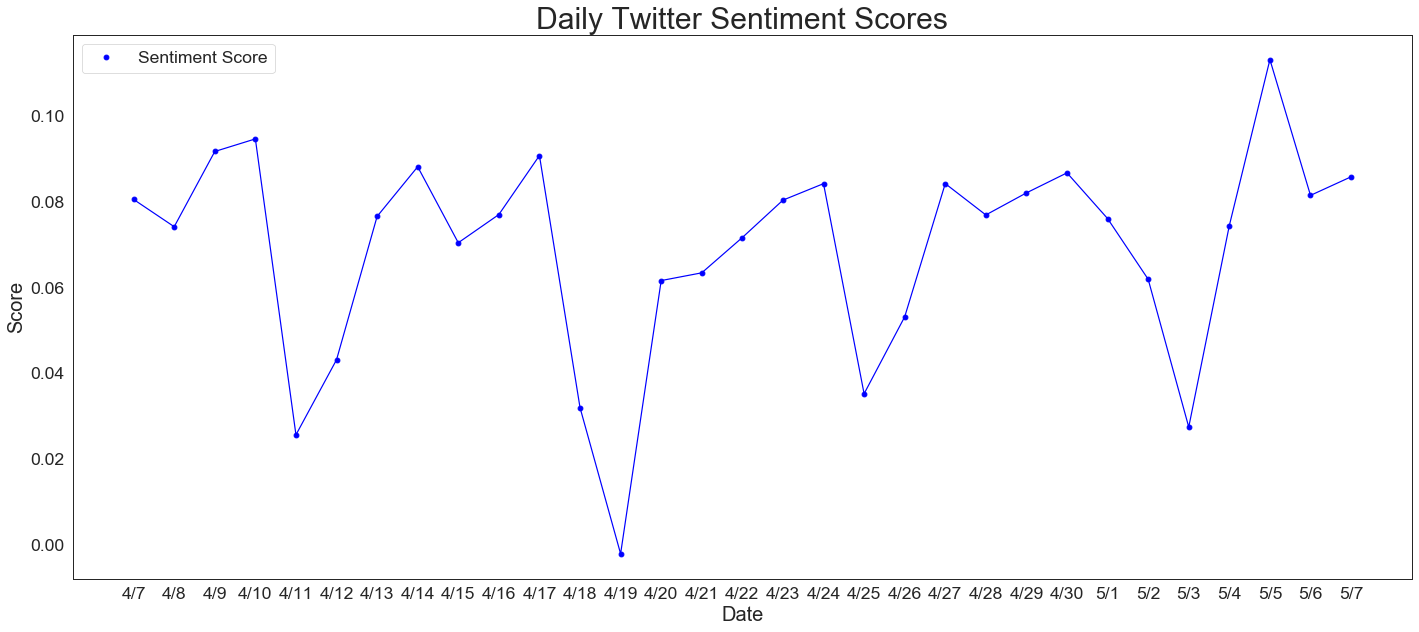

In [698]:
import matplotlib.pyplot as plt

Date = daily_sentiment_VA['Date']
Sentiment = daily_sentiment_VA['Sentiment_Score']

# "bo" is for "blue dot"
plt.plot(Date, Sentiment, 'bo', label='Sentiment Score')
plt.plot(Date, Sentiment, 'b')
# b is for "solid blue line"
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Daily Twitter Sentiment Scores', size=30)
plt.xlabel('Date', size = 20)
plt.ylabel('Score', size = 20)
plt.legend()

plt.show()

What happened on 5/5??? Why did sentiment spike?

 - Northam said things could reopen on Firday, 
 - Cinco de Mayo, Taco Tuesday, Coronavirus
 - Giving Tuesday day of action: https://www.givingtuesday.org/blog/2020/03/givingtuesday-announces-day-global-action-giving-and-unity-response-covid-19

## FOR REVIEW = Tweets from Specific Day

In [481]:
data = data_0505_clean_GIVING
len(data)

138

In [482]:
#create list of all texts for cleaning
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_score(data):
    text_body=[]
    
    for i in range(0,len(data)):
        temp_text=data['text'].iloc[i]
        text_body.append(temp_text)
    
    analyzer = SentimentIntensityAnalyzer()
    sentences = text_body


    sentiment_score = []
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        sentiment_score.append(vs)
    
        a = pd.DataFrame(sentiment_score)
    #df = pd.concat([a, text_body_df], axis=1)
    return a

In [483]:
sent = sentiment_score(data)


In [484]:
#create list of all texts for cleaning

text_body=[]
for i in range(0,len(data)):
    temp_text=data['text'].iloc[i]
    text_body.append(temp_text)
    
text_body_df = pd.DataFrame(text_body)
text_body_df.columns=['text']

In [500]:
data_county = pd.DataFrame(data["county_name"])
data_county.reset_index(inplace=True)


In [501]:
df = pd.concat([sent, text_body_df], axis=1)
df

,neg,neu,pos,compound,text
0,0.000,0.799,0.201,0.7003,"Why should State Policy Network be on your #GivingTuesdayNow list? With your donation, you can advance solutions across the 50 states to save lives and livelihoods impacted by coronavirus. https://t.co/D4Y9SdtRwd"
1,0.000,0.944,0.056,0.2924,"In Cambodia and the Philippines, WHI's teams distributed soap and worked with families to teach proper #sanitation so they could do their part to mitigate the virus' spread. We can't fight COVID-19 without soap and sanitation. #GivingTuesdayNow https://t.co/hOVgfdSNmw"
2,0.052,0.751,0.197,0.7783,"Now more than ever we need your assistance to provide U.S. diplomatic and military personnel the equipment needed to combat COVID-19 globally. With your generous donation, we can help those in need and save American lives. #GivingTuesdayNow #SOACovid19Response https://t.co/g7GHgVvOvl"
3,0.078,0.804,0.117,0.4228,"As the #coronavirus pandemic continues, more people than ever are turning to our agencies and pantries for help. With your support, they can continue to work hard to serve the most vulnerable in their communities. Donate this #GIVINGTUESDAYNOW here: https://t.co/FDU3tDpkl8 https://t.co/EDHAp6eLaN"
4,0.054,0.634,0.312,0.9086,"Today is #GivingTuesdayNow, an opportunity to support nonprofits struggling in the face of COVID-19. Considering helping one I feel so strongly about: @LettersPreSci\n$5/mo supports 1 student for a whole year! #STEM &amp; #SciComm Twitter - Retweet and help! https://t.co/71q4JlzFv0"
5,0.053,0.832,0.116,0.4767,"Today is ... #GivingTuesdayNow is a new global day of giving and unity that takes place today May 5, 2020 - as an emergency response to the unprecedented need caused by COVID-19. We encourage you to give to #UMCOR COVID-19 response fund\nhttps://t.co/hVIhFv6CR2 https://t.co/2F5eSIzWsQ"
6,0.000,0.834,0.166,0.6956,"❣️ TODAY is #GivingTuesdayNow \n\nIf you are able, please consider making a donation now to help the Pozez JCC endure COVID-19. \n\nTogether, as a J Family, we will get through this challenging time: https://t.co/HP0eWfcU3d https://t.co/iFiyjT9vBh"
7,0.000,0.781,0.219,0.8271,We honor those who served everyday @PamplinPark1865. #GivingTuesdayNow is an opportunity for you to enable us to continue telling their stories. Visit https://t.co/xvjolbM33d and help today. #GivingTuesday #nonprofit #COVID19 #coronavirus #HonorHeroes #Virginia #HonorTheFallen https://t.co/ecp6lMBz8C
8,0.000,0.804,0.196,0.8398,"With only a few hours left, consider a gift to Days End Farm Horse Rescue’s \nCOVID-19 Preparedness Fund and ensure horses in need have a place to call home &amp; receive the life-saving care they need.\n#GivingTuesdayNow! @DEFHR \n\nhttps://t.co/gTUtFsyLq1 https://t.co/ho92U8Fspk"
9,0.104,0.809,0.086,-0.1779,"The economic effects of #COVID_19 have devastated many women, men and families throughout the 21 counties and seven cities of @ArlingtonChurch. Your generosity enables us to continue to serve them. #GivingTuesdayNow https://t.co/LrwbY2TwC5 https://t.co/ijwBdfFxIb"


In [502]:
df = pd.concat([data_county, df], axis=1)
df

,index,county_name,neg,neu,pos,compound,text
0,10347,arlington county,0.000,0.799,0.201,0.7003,"Why should State Policy Network be on your #GivingTuesdayNow list? With your donation, you can advance solutions across the 50 states to save lives and livelihoods impacted by coronavirus. https://t.co/D4Y9SdtRwd"
1,12652,alexandria city,0.000,0.944,0.056,0.2924,"In Cambodia and the Philippines, WHI's teams distributed soap and worked with families to teach proper #sanitation so they could do their part to mitigate the virus' spread. We can't fight COVID-19 without soap and sanitation. #GivingTuesdayNow https://t.co/hOVgfdSNmw"
2,14033,arlington county,0.052,0.751,0.197,0.7783,"Now more than ever we need your assistance to provide U.S. diplomatic and military personnel the equipment needed to combat COVID-19 globally. With your generous donation, we can help those in need and save American lives. #GivingTuesdayNow #SOACovid19Response https://t.co/g7GHgVvOvl"
3,14089,alexandria city,0.078,0.804,0.117,0.4228,"As the #coronavirus pandemic continues, more people than ever are turning to our agencies and pantries for help. With your support, they can continue to work hard to serve the most vulnerable in their communities. Donate this #GIVINGTUESDAYNOW here: https://t.co/FDU3tDpkl8 https://t.co/EDHAp6eLaN"
4,14354,roanoke city,0.054,0.634,0.312,0.9086,"Today is #GivingTuesdayNow, an opportunity to support nonprofits struggling in the face of COVID-19. Considering helping one I feel so strongly about: @LettersPreSci\n$5/mo supports 1 student for a whole year! #STEM &amp; #SciComm Twitter - Retweet and help! https://t.co/71q4JlzFv0"
5,14403,fredericksburg city,0.053,0.832,0.116,0.4767,"Today is ... #GivingTuesdayNow is a new global day of giving and unity that takes place today May 5, 2020 - as an emergency response to the unprecedented need caused by COVID-19. We encourage you to give to #UMCOR COVID-19 response fund\nhttps://t.co/hVIhFv6CR2 https://t.co/2F5eSIzWsQ"
6,14520,fairfax county,0.000,0.834,0.166,0.6956,"❣️ TODAY is #GivingTuesdayNow \n\nIf you are able, please consider making a donation now to help the Pozez JCC endure COVID-19. \n\nTogether, as a J Family, we will get through this challenging time: https://t.co/HP0eWfcU3d https://t.co/iFiyjT9vBh"
7,14613,petersburg city,0.000,0.781,0.219,0.8271,We honor those who served everyday @PamplinPark1865. #GivingTuesdayNow is an opportunity for you to enable us to continue telling their stories. Visit https://t.co/xvjolbM33d and help today. #GivingTuesday #nonprofit #COVID19 #coronavirus #HonorHeroes #Virginia #HonorTheFallen https://t.co/ecp6lMBz8C
8,14763,alexandria city,0.000,0.804,0.196,0.8398,"With only a few hours left, consider a gift to Days End Farm Horse Rescue’s \nCOVID-19 Preparedness Fund and ensure horses in need have a place to call home &amp; receive the life-saving care they need.\n#GivingTuesdayNow! @DEFHR \n\nhttps://t.co/gTUtFsyLq1 https://t.co/ho92U8Fspk"
9,14768,arlington county,0.104,0.809,0.086,-0.1779,"The economic effects of #COVID_19 have devastated many women, men and families throughout the 21 counties and seven cities of @ArlingtonChurch. Your generosity enables us to continue to serve them. #GivingTuesdayNow https://t.co/LrwbY2TwC5 https://t.co/ijwBdfFxIb"


In [515]:
# Check to see where the Giving Tuesday Tweets are coming from
a = pd.DataFrame(df.county_name.value_counts()/138)
a.reset_index(inplace=True)
a.columns=['county_lower', 'percent_of_tweets']
a

,county_lower,percent_of_tweets
0,arlington county,0.202899
1,alexandria city,0.188406
2,fairfax county,0.137681
3,richmond city,0.115942
4,roanoke city,0.036232
5,falls church city,0.028986
6,norfolk city,0.028986
7,virginia beach city,0.021739
8,martinsville city,0.021739
9,charlottesville city,0.021739


In [521]:
county_population = pd.read_pickle('/Users/rachelmartonik/covid/county_population.pkl')
df_population = pd.merge(county_population, a, on='county_lower')
df_population.sort_values('percent_of_tweets', ascending=False)

#GivingTuesday Tweets are coming dispropotionaly from Arlington and Alexandria and Richmond

,county,total_pop,county_lower,percent_VA_pop,percent_of_tweets
0,Arlington,231803,arlington county,0.027550,0.202899
14,Alexandria city,156505,alexandria city,0.018601,0.188406
3,Fairfax,1143529,fairfax county,0.135912,0.137681
25,Richmond city,223787,richmond city,0.026598,0.115942
26,Roanoke city,99621,roanoke city,0.011840,0.036232
23,Norfolk city,245592,norfolk city,0.029189,0.028986
16,Falls Church city,14067,falls church city,0.001672,0.028986
28,Virginia Beach city,450135,virginia beach city,0.053500,0.021739
22,Martinsville city,13101,martinsville city,0.001557,0.021739
18,Harrisonburg city,53391,harrisonburg city,0.006346,0.021739


In [257]:
df.compound.describe()

count    2584.000000
mean     0.088283   
std      0.488668   
min     -0.992100   
25%     -0.273200   
50%      0.000000   
75%      0.501100   
max      0.985400   
Name: compound, dtype: float64

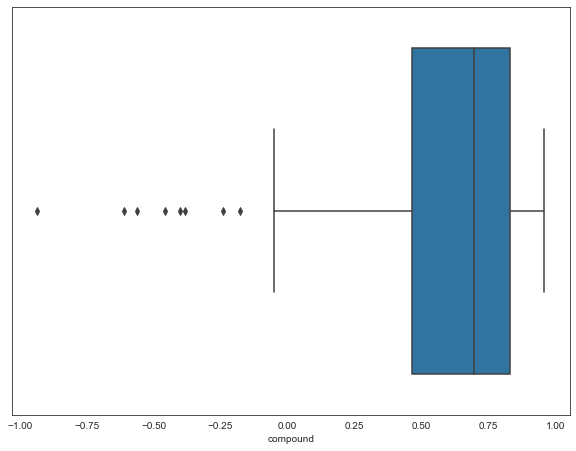

In [246]:
plt.figure(figsize=(10, 7.5))
ax = sns.boxplot(df.compound)

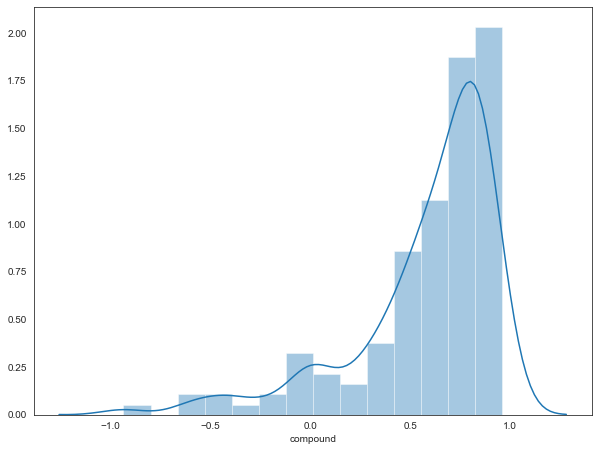

In [247]:
plt.figure(figsize=(10, 7.5))
ax = sns.distplot(df.compound)

In [248]:
# Check out the most negative tweets
pd.set_option('display.max_colwidth', -1)
df.sort_values('compound')[0:50]

/Users/rachelmartonik/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,neg,neu,pos,compound,text
80,0.289,0.711,0.000,-0.9355,"For each of us, the COVID-19 pandemic has forced a change in our personal and professional routines. And for some, the impact has been even more severe: job loss, reduced income, illness or worse have struck some of our JMU families. https://t.co/KcXXm6e0VW #GivingTuesdayNow 💜 https://t.co/crbsItyllZ"
88,0.179,0.749,0.072,-0.6124,"Today is #GivingTuesdayNow, a global day that unites us in the fight against COVID-19. At Lynchburg, we’ve established the Lynchburg Crisis Response Fund to support campus needs: https://t.co/OLoaLQy23j #UniversityOfLynchburg #HornetsTogether https://t.co/7nFRC2X5x4"
104,0.271,0.492,0.237,-0.5627,Patients with cancer need your support more than ever. Help us raise $10k today for the Conquer Cancer COVID-19 Fund to help the cancer care community https://t.co/FnzG1tWS7e #COVID19 #ConquerCancerDay #GivingTuesdayNOW https://t.co/Nv2CeQUCiD
62,0.149,0.745,0.106,-0.4588,"On this #WorldAsthmaDay and #GivingTuesdayNow, let's work together to end needless death and suffering due to #asthma, allergies and related conditions.\n\nBy making a donation to @AllergyAsthmaHQ, you’ll help us expand our programs and impact more patients. https://t.co/SWHlvC68br https://t.co/XO5Y4zXLEp"
27,0.110,0.835,0.055,-0.4019,“#Seniors who were getting by on their own suddenly depend on us for the most basic needs.” - @ACFB\n\nCBOs are struggling with the system-wide shock caused by #COVID19—but you can help with a #GivingTuesday donation to our COVID-19 Community Response Fund: https://t.co/eO1FKA3YhR https://t.co/k3A4pBfz1A
94,0.185,0.703,0.112,-0.3818,"In the fight against COVID-19, access to soap &amp; proper #sanitation is everything. Unfortunately, many vulnerable communities around the world lack these necessities. With your support, we can continue to fulfill the sanitizing needs of the communities we work. #GivingTuesdayNow https://t.co/ksUoOVFcxa"
15,0.085,0.915,0.000,-0.2411,Not sure which #nonprofits to donate to this #GivingTuesdayNow ? @ANAMarketers nonprofits responding to the #COVID19 pandemic may be found here. https://t.co/D6j7VHKY50
9,0.104,0.809,0.086,-0.1779,"The economic effects of #COVID_19 have devastated many women, men and families throughout the 21 counties and seven cities of @ArlingtonChurch. Your generosity enables us to continue to serve them. #GivingTuesdayNow https://t.co/LrwbY2TwC5 https://t.co/ijwBdfFxIb"
78,0.081,0.844,0.075,-0.0516,"#GivingTuesdayNow is a new global day of giving and unity taking place today on May 5, 2020 as an emergency response to the unprecedented need caused by COVID-19. https://t.co/BpwmQAv8vY"
112,0.100,0.808,0.092,-0.0516,"Today #GivingTuesdayNow, is a global day of giving and unity as an emergency response to the unprecedented need caused by COVID-19. https://t.co/cxrL2gX5Ns https://t.co/HSPeKinH2A"


In [249]:
# Check out the most positive tweets
pd.set_option('display.max_colwidth', -1)
df.sort_values('compound', ascending = False)[0:50]

/Users/rachelmartonik/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,neg,neu,pos,compound,text
66,0.000,0.620,0.380,0.9595,"Art has the power to connect, inspire, and console us. On this #GivingTuesdayNow, please consider supporting the #VMFA COVID-19 Relief Fund. Your gift will help us return to our full commitment of serving all Virginians once we reopen. https://t.co/RGFowE8neu https://t.co/TWyny3IBDL"
95,0.000,0.691,0.309,0.9572,"Today is #GivingTuesdayNow, a global day of generosity in response to the unprecedented need caused by COVID-19. We ask that you consider supporting RAE today to help us protect our coasts and waters so we can all enjoy them again once we can do so safely. https://t.co/hUDLTXCj80 https://t.co/dEGY4emWM3"
111,0.000,0.676,0.324,0.9459,"The MSV loves you and we can’t wait to welcome you back to our gardens, galleries, and, soon, trails. \n\nDonate during #GivingTuesdayNow, a special international day of giving in response to COVID-19. \n\nDonate here today https://t.co/9v4mNvdYQx. Thank you for your support! https://t.co/sQwE8rf21k"
79,0.000,0.753,0.247,0.9298,"Happy #GivingTuesdayNow! Sam, 12, from Uganda wrote this poem of gratitude for our generous donors. Thanks to them, his family was able to buy the food they need to get through the COVID-19 lockdown.\n\nDonating today at https://t.co/KXf0yXEQQR ? Tell us why and tag us! https://t.co/97WoiPYyoY"
30,0.049,0.607,0.344,0.9265,NSF has adapted our support in innovative ways as we fight to overcome unprecedented challenges brought on by COVID-19. ⁣We know our support for the NSW community will continue without interruption because of supporters LIKE YOU!⁣ #GivingTuesdayNow - https://t.co/V5b80q67I0 https://t.co/8q1Xs7c4va
63,0.000,0.706,0.294,0.9244,"Today is #GivingTuesdayNow, a global day of unity and giving. https://t.co/16Gn51l6LY is offering to match up to $10K in donations to @AllergyAsthmaHQ -- TODAY is the LAST DAY!\n\nYour generosity helps us continue to support patients. Help us reach our goal! https://t.co/SWHlvC68br https://t.co/t9YoISQPbx"
71,0.000,0.706,0.294,0.9186,"Today is #GivingTuesdayNow, a global day of unity created in response to #COVID19. We're doing our part by working with doctors to use lung imaging to better understand and treat COVID-19. Your support makes efforts like this possible.\n\nJoin us: https://t.co/ybbgYR6LFf https://t.co/qPwInKhJDv"
58,0.000,0.662,0.338,0.9149,"It's #GivingTuesdayNow, will you please #donate: https://t.co/NnrU9f5Er0\n\nYour donations will help #HabitatSHR continue to #build with families to help them gain more #financial security by offering more #affordablehousing in our community. https://t.co/g7cZ5GbwpU"
4,0.054,0.634,0.312,0.9086,"Today is #GivingTuesdayNow, an opportunity to support nonprofits struggling in the face of COVID-19. Considering helping one I feel so strongly about: @LettersPreSci\n$5/mo supports 1 student for a whole year! #STEM &amp; #SciComm Twitter - Retweet and help! https://t.co/71q4JlzFv0"
25,0.061,0.663,0.276,0.9000,"Right now, there are people working around the world to protect us from the threat of #COVID19. On #GivingTuesdayNow we're thankful to those GIVING their time to us, especially during times like these. View our list of charities responding to COVID-19 here https://t.co/RLyG1qhdPm"


In [251]:
a = pd.DataFrame(data_0505_clean['hashtags'].value_counts(dropna=True))
a.sort_values('hashtags', ascending=False).head(100)

,hashtags
GivingTuesdayNow,70
COVID19,32
coronavirus,20
MOAAStorms,18
Coronavirus,9
COVID,8
COVIDー19,7
SmartNews,6
PTAdvocacy,6
ThankAThon,6


In [182]:
70/len(data_0505_clean) # 2.5% of Tweets on Tuesday had the hashtag #GivingTuesdayNow

# givingtuesdaynow
# GivingTuesday

# it is also teacher appreciation week - see if week sentiment is up

0.025716385011021307

In [191]:
# Pull out Tweets with #GivingTuesdayNow to see if that is what is causing sentiment to spike
data_0505_clean['GIVING'] = data_0505_clean['hashtags'].str.contains('givingtuesday', case=False).astype(str)
data_0505_clean_GIVING = data_0505_clean[data_0505_clean["GIVING"]=='True']
data_0505_clean_NOGIVING = data_0505_clean[data_0505_clean["GIVING"]!='True']
data_0505_clean_GIVING.hashtags.value_counts()

print(len(data_0505_clean_GIVING))
print(len(data_0505_clean_NOGIVING))
print(len(data_0505_clean))

70
2652
2722


## Sentiment spiked on May 5th. Why?

5% of Tweets had #GivingTuesdayNow or #GivingTuesday hashtags (138/2722)

Sentiment Scores:
5/5 data overall = 0.113169  
5/5 data with #GivingTuesdayNow = 0.579151
5/5 data w/o #GivingTuesdayNow = 0.088283  

The average weekday sentiment is 0.081125, so I'm fairly confident the bump is from Giving Tuesday

## Additional Meta data variables are needed

Add day of week, type of day, day and week of data collection

In [114]:
num_days = len(daily_sentiment_VA)
num_days

31

In [115]:
daily_sentiment_VA['dow'] = ['Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 
                             'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 
                             'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 
                             'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 
                             'Mon','Tues', 'Wed', 'Thurs']

daily_sentiment_VA['week'] = [1, 1, 1, 1, 1, 1, 
                              2, 2, 2, 2, 2, 2, 2, 
                              3, 3, 3, 3, 3, 3, 3, 
                              4, 4, 4, 4, 4, 4, 4,
                              5, 5, 5, 5]

daily_sentiment_VA['day_type'] = ['Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekend', 'Weekend', 
                                  'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekend', 'Weekend', 
                                  'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekend', 'Weekend', 
                                  'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekend', 'Weekend', 
                                  'Weekday', 'Weekday', 'Weekday', 'Weekday' ]

daily_sentiment_VA.insert(0, 'Day_of_Collection', range(1, 1 + len(daily_sentiment_VA)))

In [116]:
# Append Tweet Frequency
daily_sentiment_VA =pd.concat([date_freq_df, daily_sentiment_VA], axis=1)
daily_sentiment_VA.drop(columns='date', inplace=True)
daily_sentiment_VA

,frequency,Day_of_Collection,Date,Sentiment_Score,dow,week,day_type
0,49194,1,4/7,0.080517,Tues,1,Weekday
1,47847,2,4/8,0.074150,Wed,1,Weekday
2,45651,3,4/9,0.091716,Thurs,1,Weekday
3,41537,4,4/10,0.094656,Fri,1,Weekday
4,29042,5,4/11,0.025552,Sat,1,Weekend
5,24927,6,4/12,0.043080,Sun,1,Weekend
6,39581,7,4/13,0.076553,Mon,2,Weekday
7,42231,8,4/14,0.088153,Tues,2,Weekday
8,42962,9,4/15,0.070407,Wed,2,Weekday
9,42669,10,4/16,0.076990,Thurs,2,Weekday


In [117]:
# Save daily_sentiment_VA to folder
daily_sentiment_VA.to_csv("/Users/rachelmartonik/MSDS_498_Capstone/data/daily_sentiment_VA.csv")

# Tweet Frequency and Sentiment Scores
Sentiment scores and Tweet frequency drop dramatically on the weekends.

Tweet frequency and sentiment score are postivly correlated. What does this mean? 

 - Is negativity up on the weekend? 
 - Or do only the more negative people tweet on the weekend? 
 - Or does this remove all those that tweet for work?
 
 To do:
  - Re-run sentiment score with only user names that tweet on the weekends
  - Compare those who tweet on Weekends and Weekdays - are they same people?

In [259]:
Weekends = daily_sentiment_VA[daily_sentiment_VA["day_type"]=="Weekend"]
Weekdays = daily_sentiment_VA[daily_sentiment_VA["day_type"]=="Weekday"]

corr, _ = pearsonr(Weekends['Day_of_Collection'], Weekends['Sentiment_Score'])
print('Correlation of week of data collection and Sentiment Score - WEEKENDS: %.3f' % corr)

corr, _ = pearsonr(Weekdays['Day_of_Collection'], Weekdays['Sentiment_Score'])
print('Correlation of week of data collection and Sentiment Score - WEEKDAYS: %.3f' % corr)

corr, _ = pearsonr(daily_sentiment_VA['Day_of_Collection'], daily_sentiment_VA['Sentiment_Score'])
print('Correlation of week of data collection and Sentiment Score - OVERALL: %.3f' % corr)

corr, _ = pearsonr(daily_sentiment_VA['week'], daily_sentiment_VA['Sentiment_Score'])
print('Pearsons correlation of week of data collection and Sentiment Score: %.3f' % corr)

Correlation of week of data collection and Sentiment Score - WEEKENDS: 0.354
Correlation of week of data collection and Sentiment Score - WEEKDAYS: 0.137
Correlation of week of data collection and Sentiment Score - OVERALL: 0.107
Pearsons correlation of week of data collection and Sentiment Score: 0.233


In [261]:
Weekdays.Sentiment_Score.describe()

count    23.000000
mean     0.081125 
std      0.010904 
min      0.061577 
25%      0.075241 
50%      0.080517 
75%      0.086265 
max      0.113169 
Name: Sentiment_Score, dtype: float64

In [262]:
Weekends.Sentiment_Score.describe()

count    8.000000
mean     0.034477
std      0.019479
min     -0.002223
25%      0.026913
50%      0.033530
75%      0.045586
max      0.061879
Name: Sentiment_Score, dtype: float64

 Overall sentiment of weekday tweets seems to be getting worse, while weekend sentiment is improving.

In [263]:
# Correlations
corr, _ = pearsonr(daily_sentiment_VA['frequency'], daily_sentiment_VA['Sentiment_Score'])
print('Pearsons correlation of Tweet frequency and Sentiment Score: %.3f' % corr)


Pearsons correlation of Tweet frequency and Sentiment Score: 0.613


Tweet frequency seems to be positivly correlated with sentiment score.

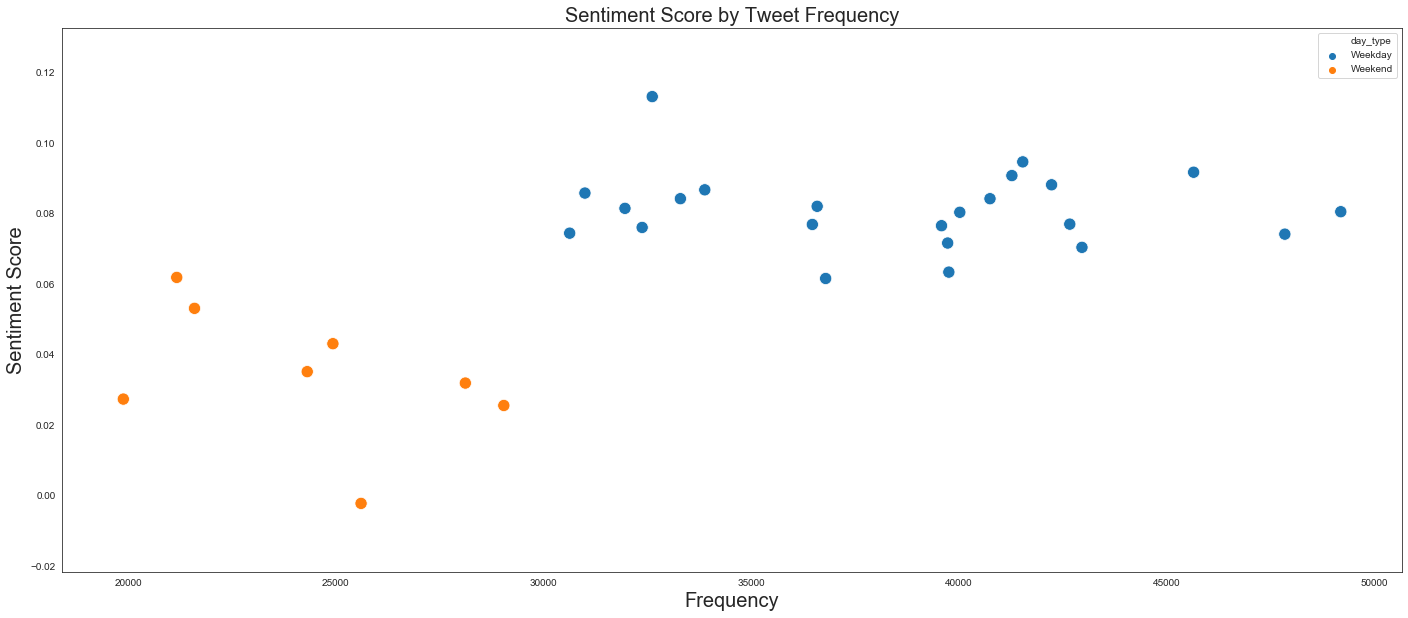

In [264]:
# Scatter plot of sentiment score by Tweet Frequency
ax = sns.scatterplot(x="frequency", y="Sentiment_Score", hue="day_type",
                     data=daily_sentiment_VA, s=150 ).set_title("Sentiment Score by Tweet Frequency",fontsize=20)
plt.xlabel("Frequency", fontsize=20)
plt.ylabel("Sentiment Score", fontsize=20)
plt.show()

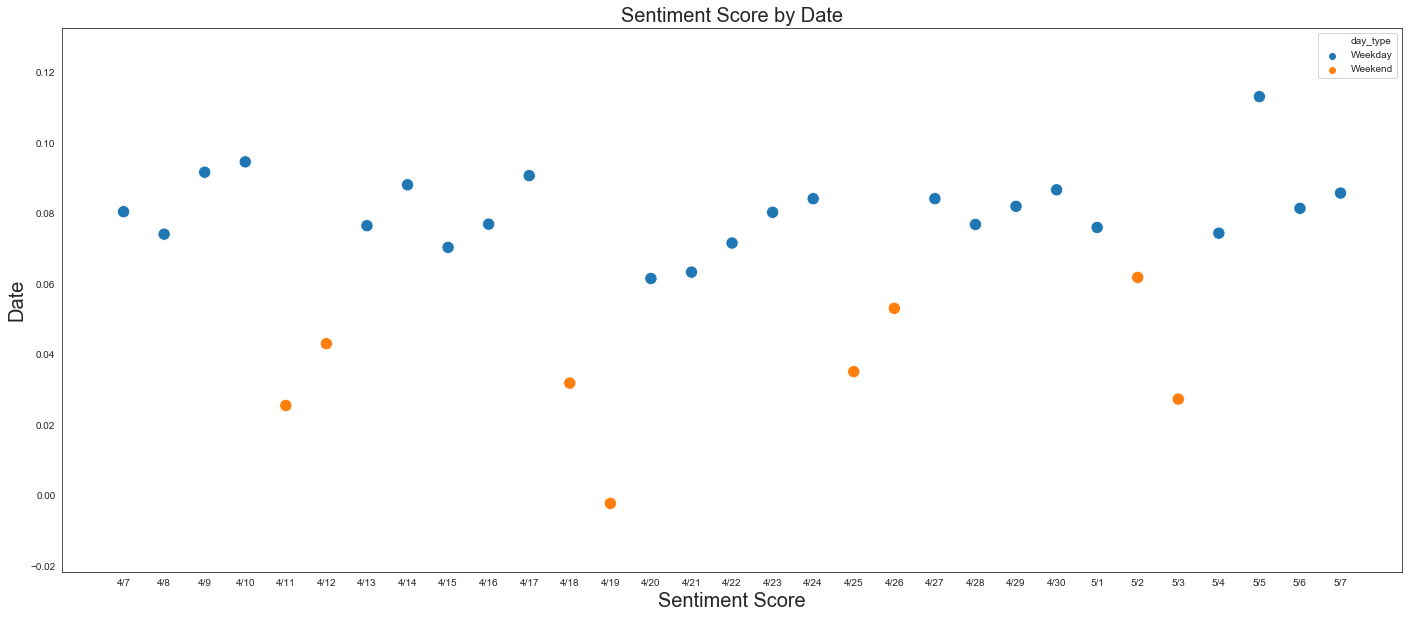

In [266]:
# Daily Sentiment Score by Date - Colored by day type
ax = sns.scatterplot(x="Date", y="Sentiment_Score", hue="day_type",
                     data=daily_sentiment_VA, s=150 ).set_title("Sentiment Score by Date",fontsize=20)
plt.xlabel("Sentiment Score", fontsize=20)
plt.ylabel("Date", fontsize=20)
plt.show()

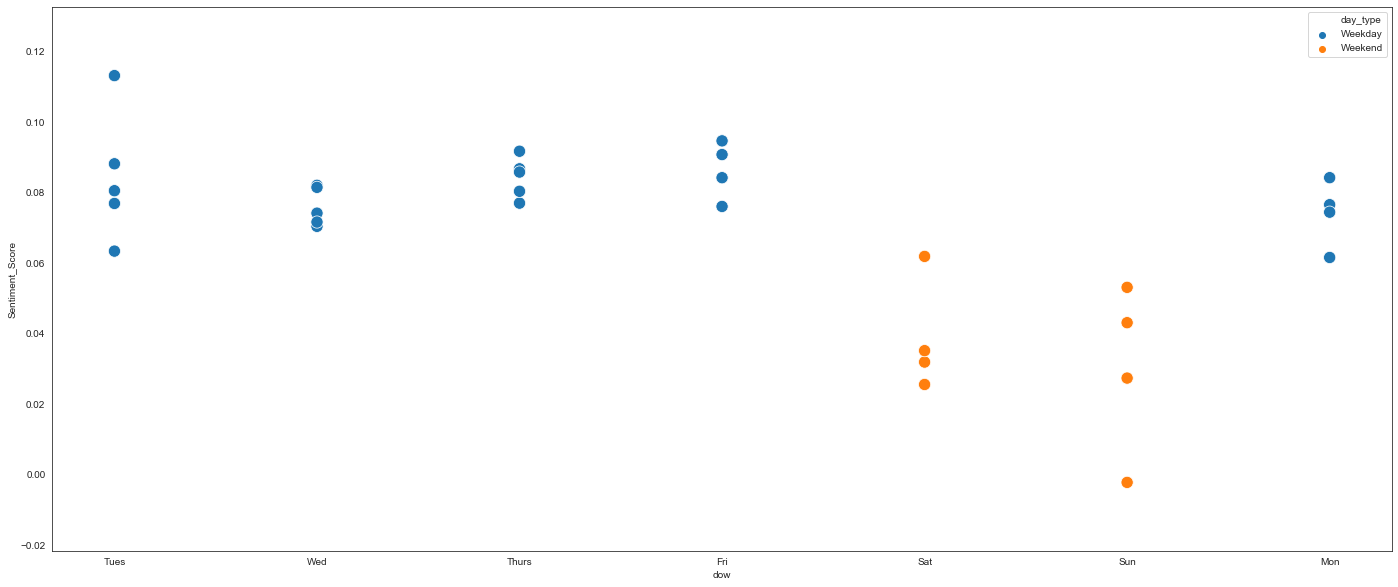

In [267]:
ax = sns.scatterplot(x="dow", y="Sentiment_Score", hue="day_type",
                     data=daily_sentiment_VA, s=150 )

In [268]:
# Split data by weeks for analysis
Week1= daily_sentiment_VA[daily_sentiment_VA['week']==1]
Week2= daily_sentiment_VA[daily_sentiment_VA['week']==2]
Week3= daily_sentiment_VA[daily_sentiment_VA['week']==3]
Week4= daily_sentiment_VA[daily_sentiment_VA['week']==4]

# Weekly mean sentiment score
daily_sentiment_VA.groupby('week')['Sentiment_Score'].mean()

week
1    0.068278
2    0.061794
3    0.064200
4    0.070741
5    0.088718
Name: Sentiment_Score, dtype: float64

In [737]:
# import matplotlib.pyplot as plt

# w1 = Week1['Sentiment_Score'].tolist()
# w2 = Week2['Sentiment_Score'].tolist()
# w3 = Week3['Sentiment_Score'].tolist()
# w4 = Week4['Sentiment_Score'].tolist()

# day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# # "bo" is for "blue dot"
# #plt.plot(day_of_week, w1, 'b', label='Week 1')
# plt.plot(day_of_week, w2, 'g', label='Week 1')
# plt.plot(day_of_week, w3, 'm', label='Week 1')
# plt.plot(day_of_week, w4, 'r', label='Week 1')
# # plt.plot('dow', 'Sentiment_Score', 'r', label='Week 2', data=Week2)
# # plt.plot('dow', 'Sentiment_Score', 'g', label='Week 3', data=Week3)
# # plt.plot('dow', 'Sentiment_Score', 'm', label='Week 4', data=Week4)

# plt.title('Sentiment Scores by week', size=20)
# plt.xlabel('Date', size = 20)
# plt.ylabel('Score', size = 20)
# plt.legend()

# plt.show()

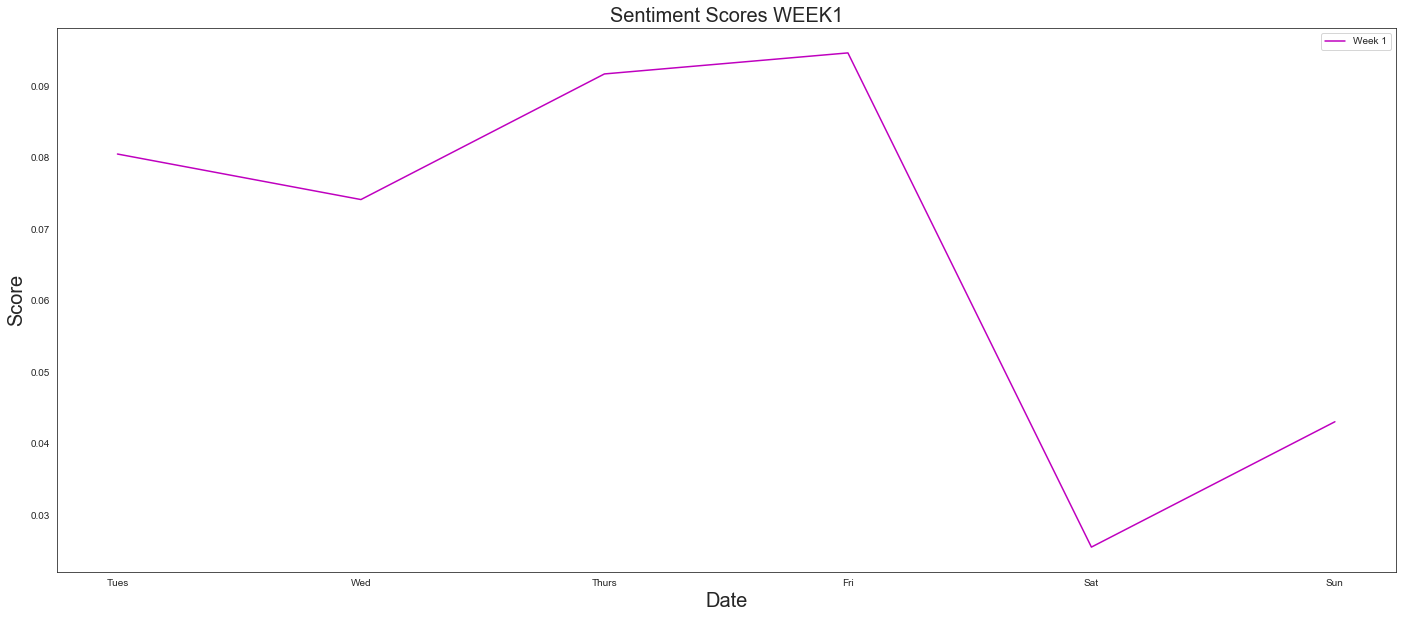

In [269]:
plt.plot('dow', 'Sentiment_Score', 'm', label='Week 1', data=Week1)
plt.title('Sentiment Scores WEEK1', size=20)
plt.xlabel('Date', size = 20)
plt.ylabel('Score', size = 20)
plt.legend()
plt.show()

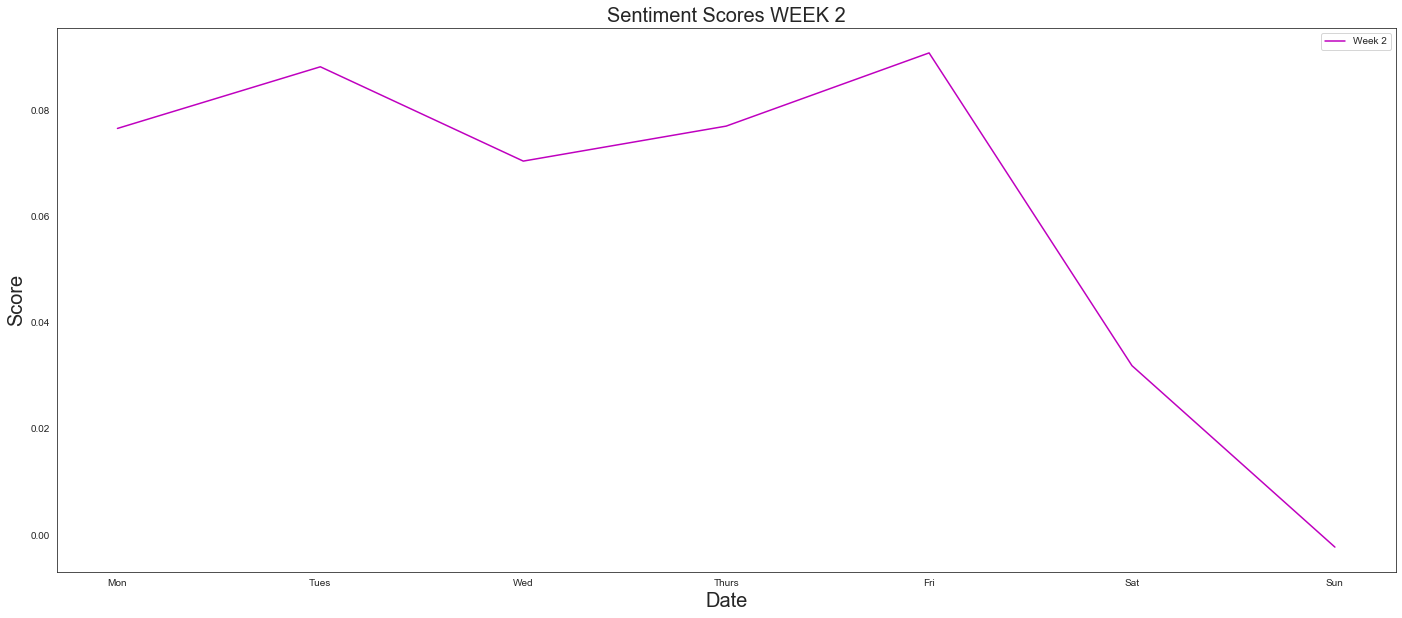

In [270]:
plt.plot('dow', 'Sentiment_Score', 'm', label='Week 2', data=Week2)
plt.title('Sentiment Scores WEEK 2', size=20)
plt.xlabel('Date', size = 20)
plt.ylabel('Score', size = 20)
plt.legend()
plt.show()

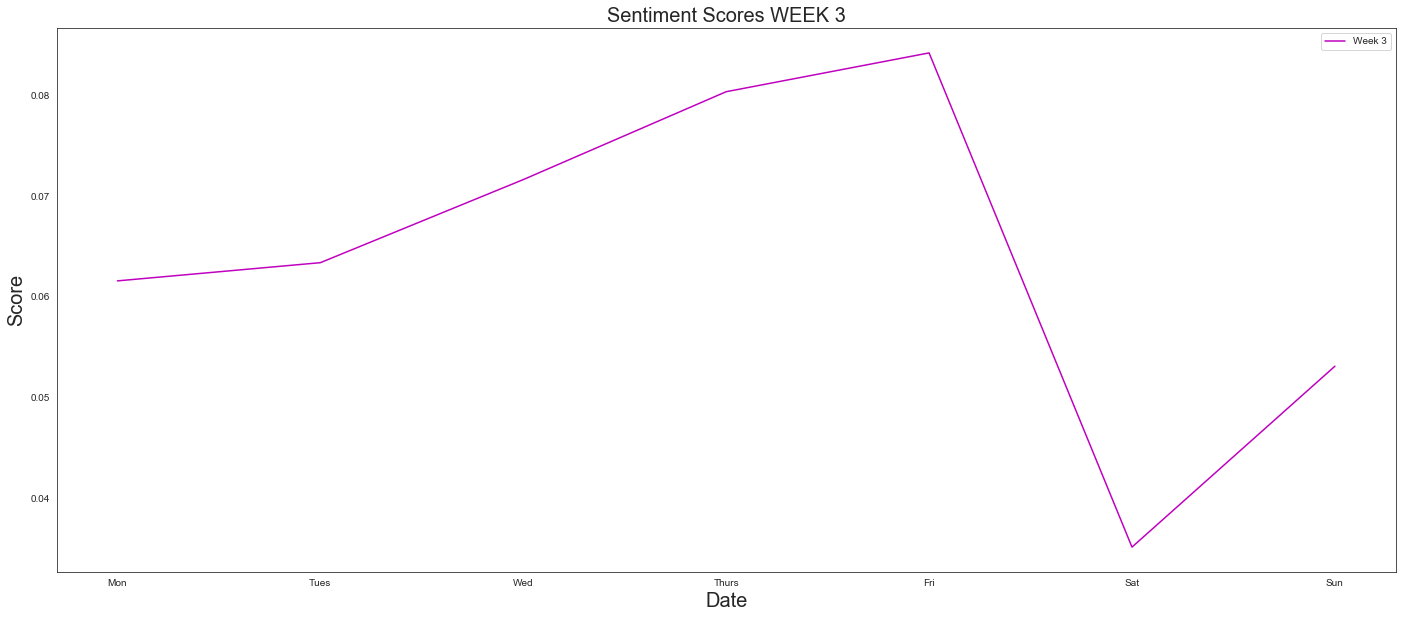

In [271]:
plt.plot('dow', 'Sentiment_Score', 'm', label='Week 3', data=Week3)
plt.title('Sentiment Scores WEEK 3', size=20)
plt.xlabel('Date', size = 20)
plt.ylabel('Score', size = 20)
plt.legend()
plt.show()

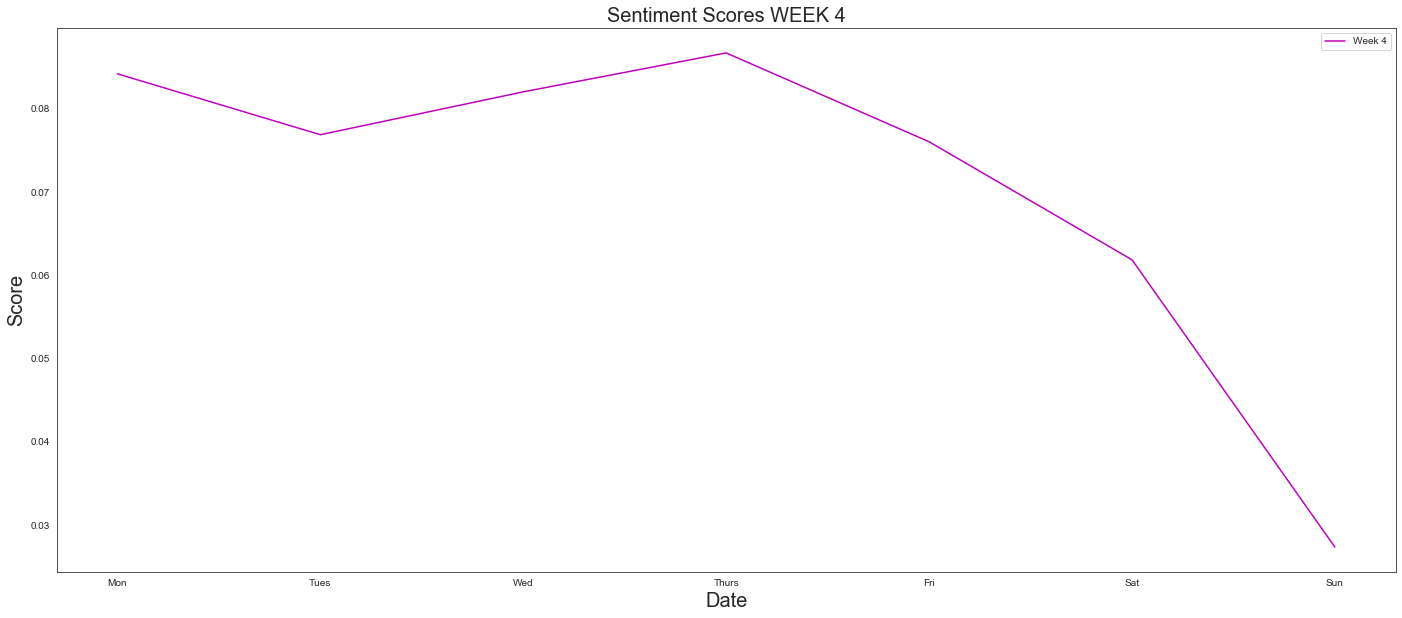

In [272]:
plt.plot('dow', 'Sentiment_Score', 'm', label='Week 4', data=Week4)
plt.title('Sentiment Scores WEEK 4', size=20)
plt.xlabel('Date', size = 20)
plt.ylabel('Score', size = 20)
plt.legend()
plt.show()

# Daily Sentiment Score By County

Use the code below to run through each cleaned daily data set (i.e data_0407_clean). The code takes the Tweet and provides a sentiment score. Then I appened county to each data set (not all counties have Tweets each day), and ran the mean sentiment score for that day by county. At the end, I compiled the daily scores into a data frame with all counties.

Code has been commented out because it only needs to be run once for each day of data.

In [526]:
# # Run through each data set separetly to get county level sentiment score
# data = data_0507_clean
# day = '05-07'

# text_body=[] #Loop through tweet to prepare for sentiment analysis
# sentiment_score = [] # Append sentiment analysis results to a list
# for i in range(0,len(data)):
#     temp_text=data['text'].iloc[i]
#     text_body.append(temp_text)
    
# sentences = text_body # Sentiment analysis
   
# for sentence in sentences:
#     vs = analyzer.polarity_scores(sentence)
#     sentiment_score.append(vs)

# # Create data frame of county names
# locations = pd.DataFrame(data['county_name'])
# locations.reset_index(inplace=True)
# #locations

In [527]:
# a = pd.DataFrame(sentiment_score)
# b = pd.concat([a, locations], axis=1)
# print (len(a))
# print (len(b))
# print (len(data))

In [528]:
# len(b.county_name.value_counts())

In [529]:
# c = pd.DataFrame(b.groupby('county_name')['compound'].mean())
# c.reset_index(inplace=True)
# c.columns=['county_name', day]
# sent_0507 = c
# sent_0507.to_pickle("sent_0507.pkl") # save the DataFrame to use in Part 2


# COVID Tracking Data

In a separate notebook, I pull daily Covid data for confirmed number of cases and deaths for Virginia. I added population data from ACS, normalizing the number of cases and deaths by every 1000 county/city resident.

In [583]:
cases = pd.read_csv("cases_per_1000.csv") 
cases.drop(columns=['Unnamed: 0'], inplace=True)
deaths = pd.read_csv("deaths_per_1000.csv") 
deaths.drop(columns=['Unnamed: 0'], inplace=True)
#cases.rename(columns={'county_lower':'county_name'}, inplace=True)
#deaths.rename(columns={'county_lower':'county_name'}, inplace=True)

In [584]:
name_change_dict = {"county_lower": "county_name",
                    "2020-04-07_per": "04-07",
                    "2020-04-08_per": "04-08",
                    "2020-04-09_per": "04-09",
                    "2020-04-10_per": "04-10",
                    "2020-04-11_per": "04-11",
                    "2020-04-12_per": "04-12",
                    "2020-04-13_per": "04-13",
                    "2020-04-14_per": "04-14",
                    "2020-04-15_per": "04-15",
                    "2020-04-16_per": "04-16",
                    "2020-04-17_per": "04-17",
                    "2020-04-18_per": "04-18",
                    "2020-04-19_per": "04-19",
                    "2020-04-20_per": "04-20",
                    "2020-04-21_per": "04-21",
                    "2020-04-22_per": "04-22",
                    "2020-04-23_per": "04-23",
                    "2020-04-24_per": "04-24",
                    "2020-04-25_per": "04-25",
                    "2020-04-26_per": "04-26",
                    "2020-04-27_per": "04-27",
                    "2020-04-28_per": "04-28",
                    "2020-04-29_per": "04-29",
                    "2020-04-30_per": "04-30",
                    "2020-05-01_per": "05-01",
                    "2020-05-02_per": "05-02",
                    "2020-05-03_per": "05-03",
                    "2020-05-04_per": "05-04",
                    "2020-05-05_per": "05-05",
                    "2020-05-06_per": "05-06",
                    "2020-05-07_per": "05-07",     
                   }

cases.rename(columns=name_change_dict, inplace=True)
deaths.rename(columns=name_change_dict, inplace=True)

In [585]:
cases

,county_name,04-07,04-08,04-09,04-10,04-11,04-12,04-13,04-14,04-15,...,04-28,04-29,04-30,05-01,05-02,05-03,05-04,05-05,05-06,05-07
0,accomack county,0.335960,0.335960,0.335960,0.366502,0.458127,0.458127,0.458127,0.458127,0.458127,...,6.810824,6.994075,8.063038,9.254169,10.781260,12.216725,12.980270,13.102437,13.102437,14.140859
1,albemarle county,0.357294,0.385501,0.404306,0.404306,0.432514,0.432514,0.460721,0.470124,0.498331,...,0.752198,0.761600,0.968455,0.968455,0.987260,1.015467,1.034272,1.034272,1.034272,1.053077
2,alexandria city,0.805086,0.913709,0.952046,1.111786,1.201240,1.265135,1.501549,1.578224,1.622951,...,4.172391,4.472701,4.817737,5.124437,5.418357,5.744225,6.006198,6.280949,6.280949,6.772947
3,alleghany county,0.130839,0.130839,0.130839,0.130839,0.261677,0.261677,0.261677,0.261677,0.261677,...,0.327097,0.392516,0.392516,0.392516,0.392516,0.392516,0.392516,0.392516,0.392516,0.392516
4,amelia county,0.544578,0.622374,0.622374,0.700171,0.700171,0.700171,0.700171,0.700171,0.777968,...,1.166952,1.166952,1.166952,1.244749,1.244749,1.244749,1.244749,1.400342,1.400342,1.322546
5,amherst county,0.250925,0.250925,0.282291,0.282291,0.313657,0.313657,0.313657,0.313657,0.313657,...,0.282291,0.345022,0.376388,0.407754,0.376388,0.439119,0.439119,0.470485,0.470485,0.470485
6,appomattox county,0.192592,0.192592,0.256789,0.320986,0.449380,0.449380,0.449380,0.449380,0.449380,...,1.091353,1.155550,1.283944,1.283944,1.348141,1.348141,1.348141,1.348141,1.348141,1.348141
7,arlington county,1.022420,1.095758,1.207922,1.345971,1.505589,1.578927,1.682463,1.729917,1.811883,...,3.731617,3.934375,4.171646,4.331264,4.503824,4.771293,4.913655,5.043075,5.043075,5.383882
8,augusta county,0.133867,0.174027,0.174027,0.200801,0.227574,0.227574,0.227574,0.227574,0.240961,...,0.522081,0.548855,0.575628,0.589015,0.602402,0.615788,0.629175,0.629175,0.629175,0.736269
9,bedford county,0.102685,0.154028,0.154028,0.192535,0.192535,0.192535,0.205370,0.205370,0.205370,...,0.320891,0.346563,0.385070,0.423577,0.436412,0.436412,0.449248,0.462083,0.462083,0.474919


In [586]:
# Create wide COVID cases and deaths data
cases_wide = pd.melt(cases, id_vars=['county_name'])
deaths_wide = pd.melt(deaths, id_vars=['county_name'])
cases_wide.columns=['county_name', 'date', 'cases_per_1000']
deaths_wide.columns=['county_name', 'date', 'deahts_per_1000']

In [587]:
# Save wide COVID case to file
cases_wide.to_csv("/Users/rachelmartonik/MSDS_498_Capstone/data/cases_wide.csv")
deaths_wide.to_csv("/Users/rachelmartonik/MSDS_498_Capstone/data/deaths_wide.csv")

In [598]:
cases_wide['cases_per_1000'].sort_values()

30      0.035326
105     0.036486
617     0.036486
233     0.036486
873     0.036486
          ...   
2095   NaN      
2223   NaN      
2351   NaN      
2479   NaN      
2607   NaN      
Name: cases_per_1000, Length: 3968, dtype: float64

In [602]:
cases_wide.describe()


,cases_per_1000
count,3876.000000
mean,1.071092
std,1.616144
min,0.035326
25%,0.318052
50%,0.592019
75%,1.131364
max,21.063303


## County/City Checks

VA has 133 total counties/cities included in ACS data. As of 5/2 (Data as of 4/30), the following discrepancies exist:

Counties in Twitter data but not COVID data:
 - Martinsville city
 - Dickenson county
 - Bland county
 - Bath county

Counites in Covid data but not in Twitter data:
 - Buena Vista city
 - Chesapeake city
 - Covington city
 - Greensville county

In [536]:
# How many unique county/cities do we have in entire merged data?
county_list = merged_cleaned_data['county_name'].value_counts()
Twitter_counties = pd.DataFrame(county_list)
Twitter_counties.reset_index(inplace=True)
Twitter_counties= Twitter_counties['index']
Twitter_counties = pd.DataFrame(Twitter_counties)
Twitter_counties.columns=['county_name']
Twitter_counties.to_csv("/Users/rachelmartonik/MSDS_498_Capstone/data/Twitter_counties.csv")

In [537]:
Twitter_counties

,county_name
0,fairfax county
1,richmond city
2,arlington county
3,alexandria city
4,charlottesville city
5,virginia beach city
6,norfolk city
7,essex county
8,loudoun county
9,prince william county


In [538]:
covid_counties = pd.DataFrame(cases.county_name)
covid_counties.to_csv("/Users/rachelmartonik/MSDS_498_Capstone/data/covid_counties.csv")

In [539]:
county_check = pd.merge(covid_counties, Twitter_counties, on='county_name')
county_check

,county_name
0,accomack county
1,albemarle county
2,alexandria city
3,alleghany county
4,amelia county
5,amherst county
6,appomattox county
7,arlington county
8,augusta county
9,bedford county


## Daily Sentiment Score Data Frame

For now, we will include counites/cities included in both the Twitter data and the COVID data as we are trying to compare the two. Will reassess later on in course.

In [550]:
# Create blank DSS Daily Sentiment Score data frame
DSS = county_check
DSS.columns=['county_name']
DSS

,county_name
0,accomack county
1,albemarle county
2,alexandria city
3,alleghany county
4,amelia county
5,amherst county
6,appomattox county
7,arlington county
8,augusta county
9,bedford county


In [551]:
date_list = [sent_0407, sent_0408, sent_0409, sent_0410, sent_0411, sent_0412, sent_0413, sent_0414, sent_0415, 
             sent_0416, sent_0417, sent_0418, sent_0419, sent_0420, sent_0421, sent_0422, sent_0423, sent_0424, 
             sent_0425, sent_0426, sent_0427, sent_0428, sent_0429, sent_0430, sent_0501, sent_0502, sent_0503,
             sent_0504, sent_0505, sent_0506, sent_0507]


In [552]:
for i in date_list:
    DSS = pd.merge(DSS, i, on='county_name', how="left")

In [553]:
DSS

,county_name,04-07,04-08,04-09,04-10,04-11,04-12,04-13,04-14,04-15,...,04-28,04-29,04-30,05-01,05-02,05-03,05-04,05-05,05-06,05-07
0,accomack county,0.210050,-0.233767,NaN,NaN,0.193233,NaN,NaN,0.763900,-0.559000,...,0.445725,0.090433,0.492600,0.902000,NaN,0.000000,0.361200,-0.226300,NaN,-0.407550
1,albemarle county,0.152820,0.511075,0.476000,0.058267,-0.624900,0.348500,0.197200,0.411033,-0.001775,...,0.166650,-0.782550,-0.510600,-0.282100,0.372100,0.560667,0.183867,0.000000,0.236433,0.076540
2,alexandria city,0.099242,0.094447,0.111315,0.090237,-0.000913,0.046577,0.110444,0.117010,0.099704,...,0.112647,0.074393,0.122031,0.127213,0.063830,0.047470,0.147704,0.190584,0.150929,0.164236
3,alleghany county,NaN,NaN,NaN,0.679200,NaN,-0.526700,NaN,0.000000,NaN,...,NaN,NaN,NaN,0.510600,NaN,NaN,NaN,NaN,NaN,NaN
4,amelia county,NaN,NaN,-0.709600,0.431000,NaN,NaN,NaN,NaN,NaN,...,NaN,0.261600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,amherst county,0.591750,0.142100,-0.017520,0.157467,-0.255300,0.338400,0.402350,0.332040,-0.318200,...,0.126950,-0.361200,0.092400,0.880500,0.231900,0.000000,0.000000,0.038500,-0.449500,0.052433
6,appomattox county,-0.381800,-0.476700,-0.140600,0.493900,NaN,-0.306200,0.000000,NaN,0.315275,...,-0.134600,0.017250,NaN,0.250000,-0.183450,0.200600,-0.831600,0.000000,0.750600,NaN
7,arlington county,0.112952,0.091583,0.114026,0.130715,0.028340,0.047672,0.116204,0.145737,0.127005,...,0.119098,0.102369,0.142239,0.076910,0.026986,-0.026546,0.028376,0.190002,0.072242,0.145283
8,augusta county,-0.165675,0.440800,0.057025,-0.014940,-0.329929,-0.195693,-0.020085,0.210800,0.317750,...,0.101333,-0.267840,0.728250,0.000000,-0.273200,0.181400,0.004283,NaN,0.015120,0.241620
9,bedford county,0.136833,-0.054782,-0.079687,0.102470,-0.002750,-0.160787,-0.023064,-0.037687,-0.059507,...,-0.294036,0.103590,0.282500,-0.272075,0.015740,-0.253580,0.380250,-0.294240,-0.422217,-0.039871


## Adding statistics to DSS

In [554]:
# Add total number of tweets per county for reference
freqs = pd.DataFrame(merged_cleaned_data.county_name.value_counts())
freqs.reset_index(inplace=True)
freqs.columns=['county_name','NumOfTweets']


In [555]:
DSS = pd.merge(DSS, freqs, on='county_name', how="left")
DSS

,county_name,04-07,04-08,04-09,04-10,04-11,04-12,04-13,04-14,04-15,...,04-29,04-30,05-01,05-02,05-03,05-04,05-05,05-06,05-07,NumOfTweets
0,accomack county,0.210050,-0.233767,NaN,NaN,0.193233,NaN,NaN,0.763900,-0.559000,...,0.090433,0.492600,0.902000,NaN,0.000000,0.361200,-0.226300,NaN,-0.407550,38
1,albemarle county,0.152820,0.511075,0.476000,0.058267,-0.624900,0.348500,0.197200,0.411033,-0.001775,...,-0.782550,-0.510600,-0.282100,0.372100,0.560667,0.183867,0.000000,0.236433,0.076540,97
2,alexandria city,0.099242,0.094447,0.111315,0.090237,-0.000913,0.046577,0.110444,0.117010,0.099704,...,0.074393,0.122031,0.127213,0.063830,0.047470,0.147704,0.190584,0.150929,0.164236,8126
3,alleghany county,NaN,NaN,NaN,0.679200,NaN,-0.526700,NaN,0.000000,NaN,...,NaN,NaN,0.510600,NaN,NaN,NaN,NaN,NaN,NaN,4
4,amelia county,NaN,NaN,-0.709600,0.431000,NaN,NaN,NaN,NaN,NaN,...,0.261600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
5,amherst county,0.591750,0.142100,-0.017520,0.157467,-0.255300,0.338400,0.402350,0.332040,-0.318200,...,-0.361200,0.092400,0.880500,0.231900,0.000000,0.000000,0.038500,-0.449500,0.052433,91
6,appomattox county,-0.381800,-0.476700,-0.140600,0.493900,NaN,-0.306200,0.000000,NaN,0.315275,...,0.017250,NaN,0.250000,-0.183450,0.200600,-0.831600,0.000000,0.750600,NaN,49
7,arlington county,0.112952,0.091583,0.114026,0.130715,0.028340,0.047672,0.116204,0.145737,0.127005,...,0.102369,0.142239,0.076910,0.026986,-0.026546,0.028376,0.190002,0.072242,0.145283,9056
8,augusta county,-0.165675,0.440800,0.057025,-0.014940,-0.329929,-0.195693,-0.020085,0.210800,0.317750,...,-0.267840,0.728250,0.000000,-0.273200,0.181400,0.004283,NaN,0.015120,0.241620,161
9,bedford county,0.136833,-0.054782,-0.079687,0.102470,-0.002750,-0.160787,-0.023064,-0.037687,-0.059507,...,0.103590,0.282500,-0.272075,0.015740,-0.253580,0.380250,-0.294240,-0.422217,-0.039871,288


In [556]:
# Drop rows that don't have a sentiment score every day
DSS.dropna(inplace=True)
DSS

,county_name,04-07,04-08,04-09,04-10,04-11,04-12,04-13,04-14,04-15,...,04-29,04-30,05-01,05-02,05-03,05-04,05-05,05-06,05-07,NumOfTweets
2,alexandria city,0.099242,0.094447,0.111315,0.090237,-0.000913,0.046577,0.110444,0.117010,0.099704,...,0.074393,0.122031,0.127213,0.063830,0.047470,0.147704,0.190584,0.150929,0.164236,8126
7,arlington county,0.112952,0.091583,0.114026,0.130715,0.028340,0.047672,0.116204,0.145737,0.127005,...,0.102369,0.142239,0.076910,0.026986,-0.026546,0.028376,0.190002,0.072242,0.145283,9056
9,bedford county,0.136833,-0.054782,-0.079687,0.102470,-0.002750,-0.160787,-0.023064,-0.037687,-0.059507,...,0.103590,0.282500,-0.272075,0.015740,-0.253580,0.380250,-0.294240,-0.422217,-0.039871,288
11,bristol city,0.033833,0.444936,0.311230,0.084631,0.038600,-0.590500,0.108033,0.038093,0.046225,...,0.081592,-0.077017,0.187209,0.034300,0.226333,0.128857,0.181229,0.198708,0.007514,296
19,charlotte county,0.007176,0.047388,0.044376,0.028057,-0.063068,0.094638,-0.088737,-0.116542,-0.038546,...,0.148971,0.099143,-0.191804,-0.016800,-0.018022,0.065722,0.010113,0.052442,0.003826,694
20,charlottesville city,0.035275,0.069563,0.114443,0.081595,0.028016,0.077999,0.071940,0.013100,0.058481,...,0.091635,0.092676,0.102755,0.115426,0.041963,0.092349,0.059403,0.076907,-0.009071,4804
22,chesterfield county,-0.106049,0.016717,-0.009326,0.063073,0.162913,0.018463,0.006169,0.155741,0.038811,...,0.106253,0.074722,-0.054124,0.116881,0.098575,0.150475,0.039380,0.044310,-0.258393,814
26,culpeper county,0.022769,0.240920,0.104184,0.179758,0.067429,0.092465,0.071865,0.171005,0.084894,...,0.001844,0.012693,0.162378,0.035981,0.170730,0.196164,0.048824,0.176609,0.106710,1501
28,danville city,-0.048389,0.000200,-0.096725,0.465500,0.354800,-0.674050,0.868200,0.238043,0.187582,...,-0.052833,0.370440,0.312667,0.058990,-0.293850,0.171550,-0.125950,0.097580,0.446750,180
31,essex county,0.140858,0.127680,0.106998,0.061044,-0.055300,-0.018789,0.090360,0.073188,0.089445,...,0.069549,0.039577,0.097139,0.069034,0.014526,0.065793,0.071737,-0.076620,-0.069679,3618


In [557]:
len(DSS)

40

In [581]:
# Save DSS to folder
DSS.to_csv("/Users/rachelmartonik/MSDS_498_Capstone/data/DSS.csv")
len(DSS)

# Create wide data
DSS_wide = pd.melt(DSS, id_vars=['county_name', 'NumOfTweets'])
DSS_wide.columns=['county_name', 'NumOfTweets','date', 'sent_score']
DSS_wide.to_csv("/Users/rachelmartonik/MSDS_498_Capstone/data/DSS_wide.csv")

In [580]:
DSS_wide

,county_name,NumOfTweets,date,sent_score
0,alexandria city,8126,04-07,0.099242
1,arlington county,9056,04-07,0.112952
2,bedford county,288,04-07,0.136833
3,bristol city,296,04-07,0.033833
4,charlotte county,694,04-07,0.007176
...,...,...,...,...
1235,washington county,215,05-07,-0.154525
1236,williamsburg city,968,05-07,-0.042061
1237,winchester city,476,05-07,-0.031025
1238,wise county,146,05-07,0.083567


In [590]:
DSS_case_wide =pd.merge(DSS_wide, cases_wide, how='left', left_on=['county_name','date'], right_on=['county_name','date'])
DSS_case_wide

,county_name,NumOfTweets,date,sent_score,cases_per_1000
0,alexandria city,8126,04-07,0.099242,0.805086
1,arlington county,9056,04-07,0.112952,1.022420
2,bedford county,288,04-07,0.136833,0.102685
3,bristol city,296,04-07,0.033833,0.059372
4,charlotte county,694,04-07,0.007176,0.082679
...,...,...,...,...,...
1235,washington county,215,05-07,-0.154525,0.753593
1236,williamsburg city,968,05-07,-0.042061,1.961049
1237,winchester city,476,05-07,-0.031025,2.195113
1238,wise county,146,05-07,0.083567,0.563741


In [592]:
cases_wide.head(100)

,county_name,date,cases_per_1000
0,accomack county,04-07,0.335960
1,albemarle county,04-07,0.357294
2,alexandria city,04-07,0.805086
3,alleghany county,04-07,0.130839
4,amelia county,04-07,0.544578
5,amherst county,04-07,0.250925
6,appomattox county,04-07,0.192592
7,arlington county,04-07,1.022420
8,augusta county,04-07,0.133867
9,bedford county,04-07,0.102685


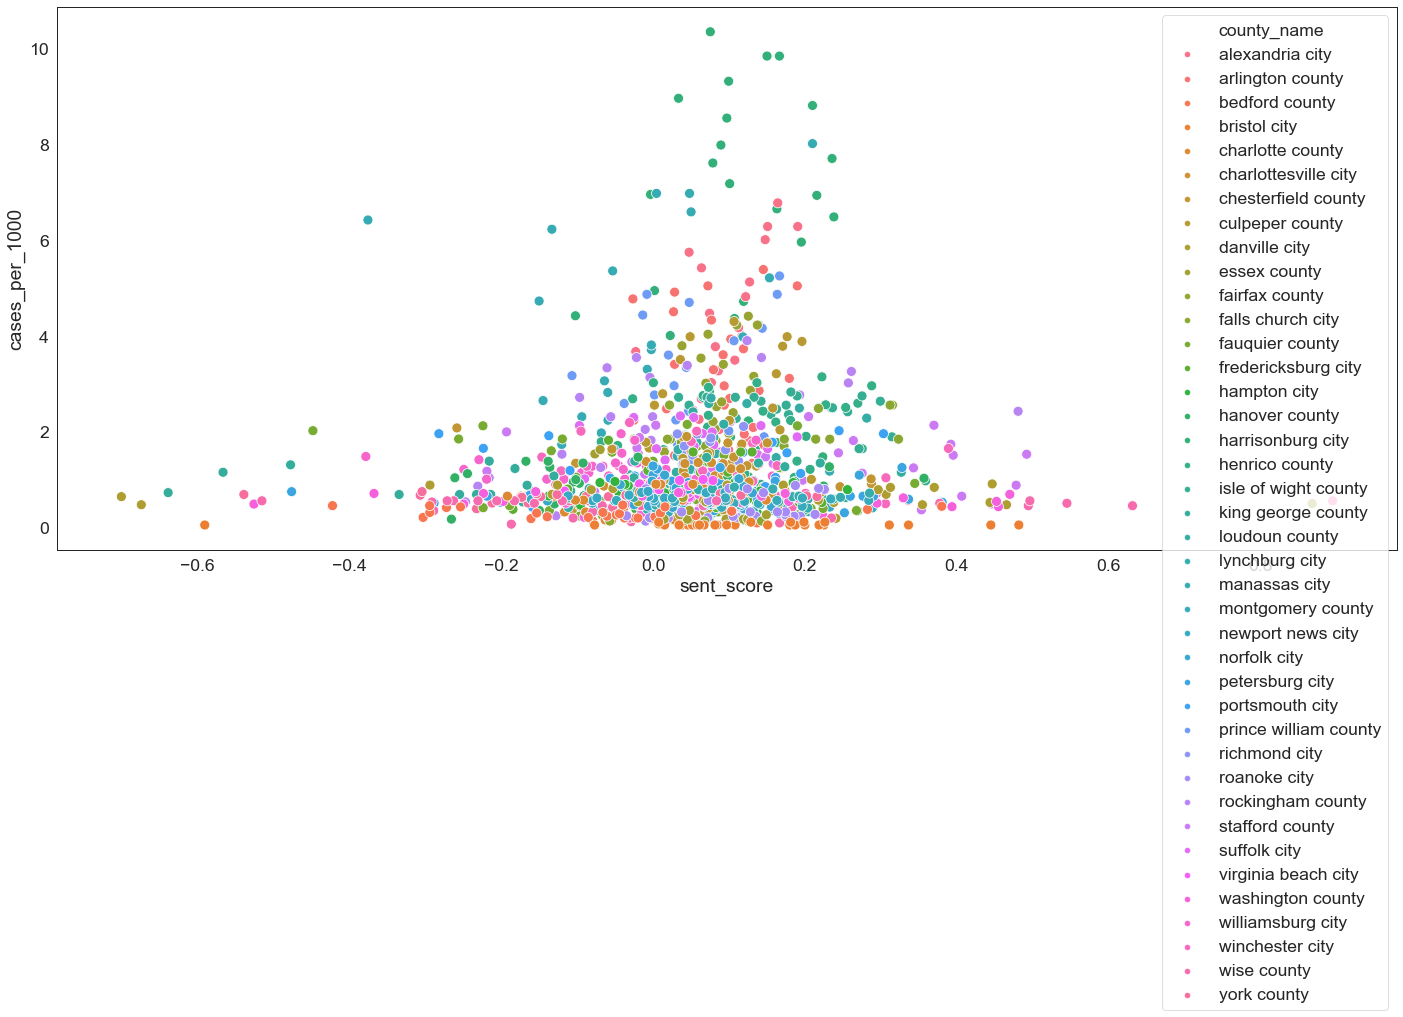

In [595]:
ax = sns.scatterplot(x="sent_score", y="cases_per_1000", hue="county_name",
                     data=DSS_case_wide, s=100 )

# FOR REVIEW = Particular tweets from a county on a specific day

In [478]:
#Bristol took a dip on 4/12
data = data_0412_clean
data = data[data['county_name'] == 'bristol city']
data

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,X1,X2,location_cleaned,county_name
14013,x38112802,x1249451322832797696,2020-04-12 21:36:23,AntsWife81515,"The coronavirus spreads at least 13 feet, travels on shoes: CDC ⁦@GovernorVA⁩ you may want to read this and adjust social distancing guidelines, such a sad world right now #COVID19 https://t.co/zHdNC8JU4q",Twitter for iPhone,205,NaN,NaN,NaN,...,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/38112802/1555204742,http://abs.twimg.com/images/themes/theme10/bg.gif,http://pbs.twimg.com/profile_images/1203189228496138240/yDcINJTJ_normal.jpg,2020-04-12,21:36:23,bristol virginia,bristol city
32163,x4795649800,x1249176647577800704,2020-04-12 03:24:56,Supertalk929,New COVID-19 fatalities reported in region - Read More: https://t.co/n1xtLF6mx6 https://t.co/p8rTfBo0eA,SuperTalkWFHG.com,79,NaN,NaN,NaN,...,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/4795649800/1521151899,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/694338556312055809/_42_QddR_normal.jpg,2020-04-12,03:24:56,bristol va,bristol city
32734,x2547728987,x1249164128889028608,2020-04-12 02:35:11,WCYB_Quon,JUST IN: The VA Dept of Health says a resident of the LENOWISOCO district who was ill with COVID-19 has died. https://t.co/dUxVb9RHdh,Twitter Web App,109,NaN,NaN,NaN,...,https://t.co/j0PfKKQlXX,https://wcyb.com/station/people/kristen-quon,NaN,https://pbs.twimg.com/profile_banners/2547728987/1580956184,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1234242731796549633/YUyaEEq2_normal.jpg,2020-04-12,02:35:11,bristol va,bristol city


In [1292]:
# wise county was really high on 4/29
data = data_0429_clean
data = data[data['county_name'] == 'wise county']
data

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,X1,X2,location_cleaned,county_name
47195,x765220198852993024,x1255303195548626944,2020-04-29 01:09:38,coach_quita_,"I’ve had some amazing conversations with recruits &amp; high school coaches during this time! Although COVID-19 has the world in slow mo, I’m thankful for the family time &amp; the relationships I’m building!! Excited to get back on the court—whenever that time comes again ❤️❤️🏀",Twitter for iPhone,279,NaN,NaN,NaN,...,https://t.co/lpKorUNW8A,https://m.youtube.com/channel/UCLGQ2ybaXuwiRkda8jUpcNw,NaN,https://pbs.twimg.com/profile_banners/765220198852993024/1570047537,NaN,http://pbs.twimg.com/profile_images/1247704455203651584/E_oHTB39_normal.jpg,2020-04-29,01:09:38,wise va,wise county


In [1317]:
# wise county was really high on 4/29
data = data_0415_clean
data = data[data['county_name'] == 'louisa county']
data

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,X1,X2,location_cleaned,county_name
47010,x36099083,x1250374913736822784,2020-04-15 10:46:24,girlgeek_rva,"@DavidBegnaud Unmitigated, the death toll from covid-19 - on the low end, assuming no triage &amp; that it only takes 2% of those infected before infecting enough to get herd immunity - would be roughly equal to US annual death from all causes combined.",Twitter for Android,239,x1250156420701589504,x42971403,DavidBegnaud,...,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/36099083/1556766857,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1164392898495954946/Ex0veDi__normal.jpg,2020-04-15,10:46:24,greater metropolitan bumpass,louisa county
47881,x96549745,x1250347812656537600,2020-04-15 08:58:43,marygerdt,"Federal Medicare and State run Medicaid... A quagmire and most people just move on, it’s all so painful. 2 reasons COVID diagnosis “mandate” 1)Funding 2)Politics. Both senseless, frustrating and hard or impossible to change 😢",Twitter for iPad,225,x1250347810710360067,x96549745,marygerdt,...,https://t.co/QMExSVCpLY,http://traveloguefortheuniverse.blogspot.com,NaN,https://pbs.twimg.com/profile_banners/96549745/1367027678,http://abs.twimg.com/images/themes/theme18/bg.gif,http://pbs.twimg.com/profile_images/1077702983918456833/4nc5dDJO_normal.jpg,2020-04-15,08:58:43,louisavirginia,louisa county


# Adding statistics to daily sentiment scores

,NumOfTweets
fairfax county,11120
richmond city,9525
arlington county,7505
alexandria city,6478
charlottesville city,3985
virginia beach city,3578
norfolk city,3097
essex county,2912
loudoun county,2354
prince william county,1304


In [ ]:
import numpy as np
pd.set_option('display.max_rows', 500) # increase notebook output
# Explore TFIDF Values - set average value and identify outliers
average_TFIDF={}
for i in matrix.columns:
    average_TFIDF[i]=np.mean(matrix[i])

average_TFIDF_DF = pd.DataFrame(average_TFIDF,index = [0]).transpose()

average_TFIDF_DF.columns=['TFIDF']

# sort by highest average TF-IDF score
average_TFIDF_DF.sort_values(by=['TFIDF'], ascending=False)

In [ ]:
# #### Word cloud of hastags ####
# from wordcloud import WordCloud, STOPWORDS 
# import matplotlib.pyplot as plt 
# comment_words = ' '
# stopwords = set(STOPWORDS) 
 
# # iterate through the csv file 
# for val in data.hashtags:      
#    # typecaste each val to string 
#    val = str(val) 
#    # split the value 
#    tokens = val.split()     
#    # Converts each token into lowercase 
#    for i in range(len(tokens)): 
#        tokens[i] = tokens[i].lower() 
         
#    for words in tokens: 
#        comment_words = comment_words + words + ' '
# # words should all be same color and horizonal 
# wordcloud = WordCloud(width = 1200, height = 800, 
#                background_color ='white', 
#                stopwords = stopwords,prefer_horizontal=1, color_func=lambda *args, **kwargs: "black",
#                min_font_size = 10).generate(comment_words) 

# # plot the WordCloud image                        
# plt.figure(figsize = (12, 8), facecolor = None) 
# plt.imshow(wordcloud, interpolation="bilinear") 
# plt.axis("off") 
# plt.tight_layout(pad = 0) 
# plt.savefig('review title word cloud.png')
# plt.show() 

In [ ]:
# Create Vocab with final processed text
tokenizer = TreebankWordTokenizer()
tokenized_sents = [tokenizer.tokenize(i) for i in final_processed_text]
tokenized_sents = reduce(lambda x, y: x + y, tokenized_sents, [])

vocab = Counter(tokenized_sents)
print(len(vocab))
vocab.most_common()

In [ ]:
# Packages for getting data ready for and building a LDA model
import gensim
from gensim import corpora, models
from pprint import pprint
from gensim.models.coherencemodel import CoherenceModel

# Change this for whatever starting text you are using
text_to_use = final_processed_text

In [ ]:
# tokenize sentences
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(sentence, deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(text_to_use))

print(data_words[:1])

In [ ]:
# Remove short reviews
# Create a list for clean snippets.
words_clean = [None] * len(data_words)
# Create a list of word counts for each clean snippet.
word_counts_per_snippet = [None] * len(data_words)

# Process words in all snippets.
for i in range(len(data_words)):
    words_clean[i] = [snippet.lower() for snippet in data_words[i]]
    word_counts_per_snippet[i] = len(words_clean[i])
    
    # Plot a histogram for word counts per snippet, set bins to num of unique values in the list.
plt.hist(word_counts_per_snippet, bins = len(set(word_counts_per_snippet))) 
plt.xlabel('Number of words per snippet')
plt.ylabel('Frequency')

In [ ]:
# Convert word counts list and snippets list to numpy arrays.
word_counts_array = np.array(word_counts_per_snippet) 
clean_array = np.array(words_clean) 
print(len(clean_array))

In [ ]:
# Find indices of all snippets where there are greater than or equal to 4 words.
valid_snippets = np.where(word_counts_array >= 1)[0] 
print(len(valid_snippets))

In [ ]:
# Subset the clean_array to keep only those where there are at least 4 words.
clean_array = clean_array[valid_snippets] 
print(len(clean_array))
# Convert the array back to a list.
clean_array = clean_array.tolist() 


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(clean_array, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[clean_array], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[clean_array[0]]])

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# LEMMNITIZE
# Form Bigrams
data_words_bigrams = make_bigrams(clean_array)

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

In [ ]:
nlp = spacy.load("en_core_web_sm")
len(corpus) # removed 88 tweets because after cleaning they were 1 word or less

# Building the Topic Model
In addition to the corpus and dictionary, you need to provide the number of topics as well.

__alpha__ and __beta__ are hyperparameters that affect sparsity of the topics. According to the Gensim docs, both defaults to 1.0/num_topics prior. Alpha parameter is Dirichlet prior concentration parameter that represents document-topic density — with a higher alpha, documents are assumed to be made up of more topics and result in more specific topic distribution per document. Beta parameter is the same prior concentration parameter that represents topic-word density — with high beta, topics are assumed to made of up most of the words and result in a more specific word distribution per topic.

__chunksize__ is the number of documents to be used in each training chunk. 

__update_every__ determines how often the model parameters should be updated and passes is the total number of training passes.

The  LDA model is built with 20 different topics where each topic is a combination of keywords and each keyword contributes a certain weightage to the topic.

The relationship between chunksize, passes, and update_every is the following:

__passes:__ Number of passes through the entire corpus

__chunksize:__ Number of documents to load into memory at a time and process E step of EM.

__update_every:__ number of chunks to process prior to moving onto the M step of EM.


--In general a chunksize of 100k and update_every set to 1 is equivalent to a chunksize of 50k and update_every set to 2. The primary difference is that you will save some memory using the smaller chunksize, but you will be doing multiple loading/processing steps prior to moving onto the maximization step. Passes are not related to chunksize or update_every. Passes is the number of times you want to go through the entire corpus. Below are a few examples of different combinations of the 3 parameters and the number of online training updates which will occur while training LDA.

    chunksize = 100k, update_every=1, corpus = 1M docs, passes =1 : 10 updates total
    chunksize = 50k ,  update_every=2, corpus = 1M docs, passes =1 : 10 updates total
    chunksize = 100k, update_every=1, corpus = 1M docs, passes =2 : 20 updates total
    chunksize = 100k, update_every=1, corpus = 1M docs, passes =4 : 40 updates total

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=14, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=200,
                                           passes=10,
                                           alpha=2,
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

# Number of Topics

Compute the coherance score for a range of topics to see which one performs best

In [ ]:
# Compute the coherance score for a range of topics to see which one performs best
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=200,
                                           passes=10,
                                           alpha=2,
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary,
coherence='c_v') 
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [ ]:
start = 2
limit = 50
step = 2

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, 
                                                        texts=data_words_bigrams, limit=limit, start=start, step=step)

In [ ]:
# Plot graph of topic list
# Show graph
import matplotlib.pyplot as plt 
limit=limit; start=start; step=step;
plt.figure(figsize=(15, 10))
x = range(2, 50, 2)
plt.plot(x, coherence_values) 
plt.xlabel("Num Topics") 
plt.ylabel("Coherence score") 
plt.legend(("coherence_values"), loc='best') 
plt.savefig('pro_coherence.png')
plt.show() 

#17 best number of negative topics

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [ ]:
#Get the topics with the highest coherence score the coherence for each topic.
# Shows coherence score for each topic (ranked)
lda_model.top_topics(corpus=corpus, texts=data_words_bigrams, dictionary=id2word, coherence='c_v', topn=10, processes=-1)

# Topic Visualization

 - Topics in circles closer to each other are closer to each other in meaning
 - Topics farther away are more dissimilar in meaning
 - Circle size is related to the number of documents that contain the topic
      - Topics found in more documents are bigger circles
      - Topics found in fewer documents are smaller circles
      

 - Blue bars represent the overall term frequency in corpus
 - Red bars represent term frequency in selected topic
 - The slider at the top represents the value of lamda, a relevance metric
    - Default is 1 which means that the term's place in the relevance ranking below is solely based on its frequency within a selected topic
     - When 0, the ranking re-arranges itself to be based on the term's frequency within topic with respect to its freuqncy within corpus
     - When set to be between 0 and 1,the ranking will depend on both 

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

In [ ]:
import multiprocessing

from gensim.models import Word2Vec

In [ ]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer

In [ ]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [ ]:
w2v_model.build_vocab(text_to_use, progress_per=10000)

In [ ]:
#t = time()

w2v_model.train(text_to_use, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

#print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))



In [ ]:
w2v_model.init_sims(replace=True)

In [ ]:
w2v_model.wv.most_similar(positive=["hospital"])

In [ ]:
vocabulary